In [1]:
!pip install -q streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'iframe'
import random

In [3]:
data=pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737973800,2025-01-27 06:30,22.3,72.1,Clear,...,14.985,19.240,1,2,06:51 AM,06:30 PM,05:11 AM,04:53 PM,Waning Crescent,7
49692,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737973800,2025-01-27 17:30,18.4,65.1,Sunny,...,23.310,27.750,2,2,06:35 AM,05:44 PM,04:39 AM,03:28 PM,Waning Crescent,9
49693,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737973800,2025-01-27 13:30,20.1,68.3,Sunny,...,18.130,42.735,2,2,06:33 AM,05:59 PM,04:41 AM,03:59 PM,Waning Crescent,8
49694,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1737973800,2025-01-27 12:30,24.2,75.5,Light rain shower,...,5.365,5.365,1,1,05:55 AM,06:44 PM,03:36 AM,05:14 PM,Waning Crescent,8


## ***Data Explanation***

*This dataset delivers daily weather insights for capital cities worldwide, focusing on present conditions rather than forecasts. Beginning on August 29, 2023, it offers an extensive array of over 40 features, such as temperature, wind speed, atmospheric pressure, precipitation levels, humidity, visibility, and air quality metrics, among others. This comprehensive collection is ideal for examining global weather dynamics, uncovering climate patterns, and exploring the interplay between various weather factors. It serves as a valuable resource for climate research and trend analysis on an international scale.*

#### ***Exlanation of Data Columns***

- ***Country:*** *The country where the weather data is recorded.*
- ***Location Name:*** *The name of the city or location being monitored.*
- ***Latitude:*** *Geographic latitude coordinate of the location.*
- ***Longitude:*** *Geographic longitude coordinate of the location.*
- ***Timezone:*** *The timezone applicable to the location.*
- ***Last Updated Epoch:*** *Unix timestamp marking the last data update.*
- ***Last Updated:*** *Local time at which the data was last updated.*
- ***Temperature (Celsius):*** *Current temperature in degrees Celsius.*
- ***Temperature (Fahrenheit):*** *Current temperature in degrees Fahrenheit.*
- ***Condition Description:*** *A textual description of the current weather condition.*
- ***Wind Speed (MPH):*** *Wind speed measured in miles per hour.*
- ***Wind Speed (KPH):*** *Wind speed measured in kilometers per hour.*
- ***Wind Direction (Degrees):*** *Wind direction represented in degrees.*
- ***Wind Direction (Compass):*** *Wind direction shown as a 16-point compass notation.*
- ***Pressure (Millibars):*** *Atmospheric pressure in millibars.*
- ***Pressure (Inches):*** *Atmospheric pressure in inches.*
- ***Precipitation (MM):*** *Amount of precipitation in millimeters.*
- ***Precipitation (Inches):*** *Amount of precipitation in inches.*
- ***Humidity:*** *Relative humidity represented as percentage.*
- ***Cloud Cover:*** *Cloud coverage expressed as a percentage.*
- ***Feels Like (Celsius):*** *Perceived temperature in degrees Celsius.*
- ***Feels Like (Fahrenheit):*** *Perceived temperature in degrees Fahrenheit.*
- ***Visibility (KM):*** *Visibility distance in kilometers.*
- ***Visibility (Miles):*** *Visibility distance in miles.*
- ***UV Index:*** *Measurement of the ultraviolet radiation level.*
- ***Wind Gust (MPH):*** *Wind gust speed in miles per hour.*
- ***Wind Gust (KPH):*** *Wind gust speed in kilometers per hour.*
- ***Air Quality - Carbon Monoxide:*** *Concentration of carbon monoxide in the air.*
- ***Air Quality - Ozone:*** *Concentration of ozone in the air.*
- ***Air Quality - Nitrogen Dioxide:*** *Concentration of nitrogen dioxide in the air.*
- ***Air Quality - Sulphur Dioxide:*** *Concentration of sulphur dioxide in the air.*
- ***Air Quality - PM2.5:*** *Particulate matter smaller than 2.5 microns in the air.*
- ***Air Quality - PM10:*** *Particulate matter smaller than 10 microns in the air.*
- ***Air Quality - US EPA Index:*** *Air quality index based on the US EPA standard.*
- ***Air Quality - GB DEFRA Index:*** *Air quality index based on the GB DEFRA standard.*
- ***Sunrise:*** *Local time of sunrise at the location.*
- ***Sunset:*** *Local time of sunset at the location.*
- ***Moonrise:*** *Local time of moonrise at the location.*
- ***Moonset:*** *Local time of moonset at the location.*
- ***Moon Phase:*** *The current phase of the moon.*
- ***Moon Illumination:*** *Percentage of the moon currently illuminated.*


## ***Data Preprocessing***

#### ***Checking Data Types, Number of Data and Columns***

In [4]:
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737973800,2025-01-27 06:30,22.3,72.1,Clear,...,14.985,19.240,1,2,06:51 AM,06:30 PM,05:11 AM,04:53 PM,Waning Crescent,7
49692,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737973800,2025-01-27 17:30,18.4,65.1,Sunny,...,23.310,27.750,2,2,06:35 AM,05:44 PM,04:39 AM,03:28 PM,Waning Crescent,9
49693,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737973800,2025-01-27 13:30,20.1,68.3,Sunny,...,18.130,42.735,2,2,06:33 AM,05:59 PM,04:41 AM,03:59 PM,Waning Crescent,8
49694,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1737973800,2025-01-27 12:30,24.2,75.5,Light rain shower,...,5.365,5.365,1,1,05:55 AM,06:44 PM,03:36 AM,05:14 PM,Waning Crescent,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49696 entries, 0 to 49695
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       49696 non-null  object 
 1   location_name                 49696 non-null  object 
 2   latitude                      49696 non-null  float64
 3   longitude                     49696 non-null  float64
 4   timezone                      49696 non-null  object 
 5   last_updated_epoch            49696 non-null  int64  
 6   last_updated                  49696 non-null  object 
 7   temperature_celsius           49696 non-null  float64
 8   temperature_fahrenheit        49696 non-null  float64
 9   condition_text                49696 non-null  object 
 10  wind_mph                      49696 non-null  float64
 11  wind_kph                      49696 non-null  float64
 12  wind_degree                   49696 non-null  int64  
 13  w

> ***last_update must be a datatime.***

In [6]:
data.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [7]:
data['last_updated']=pd.to_datetime(data['last_updated'])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49696 entries, 0 to 49695
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       49696 non-null  object        
 1   location_name                 49696 non-null  object        
 2   latitude                      49696 non-null  float64       
 3   longitude                     49696 non-null  float64       
 4   timezone                      49696 non-null  object        
 5   last_updated_epoch            49696 non-null  int64         
 6   last_updated                  49696 non-null  datetime64[ns]
 7   temperature_celsius           49696 non-null  float64       
 8   temperature_fahrenheit        49696 non-null  float64       
 9   condition_text                49696 non-null  object        
 10  wind_mph                      49696 non-null  float64       
 11  wind_kph                    

- *the object types looks correct.*
- *we have* ***45444 entries*** and ***41 colums.***
- *The dataset includes* ***23 floats, 7 integers and 11 objects.***

#### ***Detecting Missing Values***

In [9]:
data.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

> ***The dataset does not include missing values.***

### ***Dublication Check***

In [10]:
duplicates = data.duplicated().sum()

if data.duplicated().any():
    print(f"Duplicates are present. Total duplicate: {duplicates}")
else:
    print(f"There are no duplicated data in the Dataset.")

There are no duplicated data in the Dataset.


### ***Standardize Country Names and Displaying Unique Values***

In [11]:
data['country'] = data['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
data['country'] = data['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
data['country'] = data['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
data['country'] = data['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
data['country'] = data['country'].apply(lambda x: 'Yemen' if x == 'Jemen' else x)
data['country'] = data['country'].apply(lambda x: 'Turkmenistan' if x == 'Turkménistan' else x)
data['country'] = data['country'].apply(lambda x: 'Belgium' if x == 'Bélgica' else x)
data['country'] = data['country'].apply(lambda x: 'South Korea' if x == 'Südkorea' else x)
data['country'] = data['country'].apply(lambda x: 'Morocco' if x == 'Marrocos' else x)
data['country'] = data['country'].apply(lambda x: 'India' if x == 'Inde' else x)
data['country'] = data['country'].apply(lambda x: 'Poland' if x == 'Polônia' else x)
data['country'] = data['country'].apply(lambda x: 'Mexico' if x == 'Mexique' else x)
data['country'] = data['country'].apply(lambda x: 'Saint Vincent and the Grenadines' if x == 'Saint-Vincent-et-les-Grenadines' else x)
data['country'] = data['country'].apply(lambda x: 'Saudi Arabia' if x == 'Saudi Arabien' else x)
data['country'] = data['country'].apply(lambda x: 'Latvia' if x == 'Letonia' else x)
data['country'] = data['country'].apply(lambda x: 'Estonia' if x == 'Estonie' else x)
data['country'] = data['country'].apply(lambda x: 'Comoros' if x == 'Komoren' else x)
data['country'] = data['country'].apply(lambda x: 'Malaysia' if x == 'Malásia' else x)
data['country'] = data['country'].apply(lambda x: 'United States of America' if x == 'USA United States of America' else x)
data['country'] = data['country'].apply(lambda x: 'Democratic Republic of Congo' if x == 'Congo' else x)
data['country'] = data['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)


In [12]:
non_unique_countries=data['country'].nunique()
unique_countries=data['country'].unique()
print(f'Num Unique countries are: {non_unique_countries}')
print(f'There are {unique_countries} unique values in the country column.')

Num Unique countries are: 189
There are ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros'
 'Democratic Republic of Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 '

In [13]:
data['condition_text'] = data['condition_text'].apply(lambda x: 'Partly Cloudy' if x == 'Partly cloudy' else x)
data['condition_text'] = data['condition_text'].apply(lambda x: 'Patchy light rain with thunder' if x == 'Patchy light rain in area with thunder' else x)



In [14]:
non_unique_cond_text=data['condition_text'].nunique()
unique_cond_text=data['condition_text'].unique()
print(f'Num Unique contional_text are: {non_unique_cond_text}')
print(f'There are {unique_cond_text} unique values in the conditional text column.')

Num Unique contional_text are: 42
There are ['Partly Cloudy' 'Sunny' 'Light drizzle' 'Clear' 'Overcast'
 'Moderate or heavy rain with thunder' 'Patchy light rain with thunder'
 'Fog' 'Patchy rain nearby' 'Light rain' 'Mist' 'Cloudy'
 'Thundery outbreaks in nearby' 'Moderate rain' 'Light rain shower'
 'Moderate rain at times' 'Moderate or heavy rain shower'
 'Heavy rain at times' 'Patchy light rain' 'Patchy light drizzle'
 'Thundery outbreaks possible' 'Patchy rain possible'
 'Moderate or heavy rain in area with thunder' 'Heavy rain'
 'Torrential rain shower' 'Freezing fog' 'Moderate or heavy snow showers'
 'Light sleet' 'Blizzard' 'Moderate snow' 'Light snow'
 'Light sleet showers' 'Light freezing rain' 'Heavy snow' 'Blowing snow'
 'Patchy heavy snow' 'Light snow showers' 'Moderate or heavy sleet'
 'Patchy light snow' 'Patchy moderate snow' 'Freezing drizzle'
 'Moderate or heavy snow in area with thunder'] unique values in the conditional text column.


#### ***Decriptive Statistics for Numeric and Non-numeric Colums***

In [15]:
data.describe(include=[np.number])

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,49696.000000,49696.000000,4.969600e+04,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,...,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000,49696.000000
mean,19.140833,22.203601,1.726922e+09,22.945694,73.303705,8.286872,13.340430,170.844012,1013.758814,29.935694,...,19.278570,518.210443,62.810470,14.169951,10.738422,23.726655,46.705987,1.657518,2.531230,49.256479
std,24.480847,65.791240,6.436321e+06,9.214742,16.586447,9.817821,15.798945,103.155171,7.074444,0.208802,...,17.510558,989.890365,37.662815,25.872917,51.722746,45.688969,141.587519,0.964330,2.484448,34.820791
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,964.000000,28.470000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721307e+09,18.200000,64.700000,4.000000,6.500000,82.000000,1010.000000,29.830000,...,10.800000,220.300000,37.000000,0.900000,0.700000,4.800000,7.770000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.727001e+09,25.300000,77.500000,6.900000,11.200000,164.000000,1013.000000,29.910000,...,17.000000,312.650000,59.000000,2.960000,2.100000,12.038000,18.870000,1.000000,2.000000,49.000000
75%,40.400000,50.580000,1.732523e+09,29.000000,84.200000,11.600000,18.700000,258.000000,1017.000000,30.030000,...,25.700000,480.700000,83.175000,14.430000,7.955000,26.640000,42.550000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.737974e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [16]:
data.describe(include=[object])

,country,location_name,timezone,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,moon_phase
count,49696,49696,49696,49696,49696,49696,49696,49696,49696,49696
unique,189,248,190,42,16,444,534,1441,1441,8
top,Bulgaria,Kabul,Asia/Bangkok,Partly Cloudy,E,05:56 AM,06:02 PM,No moonrise,No moonset,Waning Crescent
freq,544,256,971,18685,4747,558,488,1743,1547,11226


## ***Analytical Questions with Visualization***

### ***1- What is the average temperature (Celsius) across all countries and how does it vary by continent?***

In [17]:
continent_mapping = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cabo Verde': 'Africa', 'Cameroon': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Comoros': 'Africa',
    'Djibouti': 'Africa', 'Egypt': 'Africa', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa',
    'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa',
    'Ghana': 'Africa', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Ivory Coast': 'Africa',
    'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa',
    'Niger': 'Africa', 'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Sao Tome and Principe': 'Africa',
    'Senegal': 'Africa', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Somalia': 'Africa',
    'South Africa': 'Africa', 'South Sudan': 'Africa', 'Sudan': 'Africa', 'Tanzania': 'Africa',
    'Togo': 'Africa', 'Tunisia': 'Africa', 'Uganda': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa', 'Cape Verde': 'Africa',
    'Democratic Republic of Congo': 'Africa','Swaziland': 'Africa', 
    'Seychelles Islands':'Africa',


    
    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei Darussalam': 'Asia', 'Cambodia': 'Asia',
    'China': 'Asia', 'Cyprus': 'Asia', 'Georgia': 'Asia and Europe', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Lebanon': 'Asia',
    'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia', 'Myanmar': 'Asia',
    'Nepal': 'Asia', 'North Korea': 'Asia', 'Oman': 'Asia', 'Pakistan': 'Asia',
    'Philippines': 'Asia', 'Qatar': 'Asia', 'Saudi Arabia': 'Asia', 'Singapore': 'Asia',
    'South Korea': 'Asia', 'Sri Lanka': 'Asia', 'Syria': 'Asia', 'Tajikistan': 'Asia',
    'Thailand': 'Asia', 'Timor-Leste': 'Asia', 'Turkey': 'Asia and Europe', 'Turkmenistan': 'Asia',
    'United Arab Emirates': 'Asia', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 'Yemen': 'Asia','Kyrghyzstan': 'Asia',
    
    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Czech Republic': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe', 'Italy': 'Europe',
    'Kosovo': 'Europe', 'Latvia': 'Europe', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe',
    'Luxembourg': 'Europe', 'Malta': 'Europe', 'Moldova': 'Europe', 'Monaco': 'Europe',
    'Montenegro': 'Europe', 'Netherlands': 'Europe', 'North Macedonia': 'Europe',
    'Norway': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe',
    'Russia': 'Asia and Europe', 'San Marino': 'Europe', 'Serbia': 'Europe', 'Slovakia': 'Europe',
    'Slovenia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Ukraine': 'Europe', 'United Kingdom': 'Europe', 'Vatican City': 'Europe', 'Macedonia':'Europe', 
    'Estonie':'Europe', 'Letonia':'Europe',
    
    # North America
    'Antigua and Barbuda': 'North America', 'Bahamas': 'North America', 'Barbados': 'North America',
    'Belize': 'North America', 'Canada': 'North America', 'Costa Rica': 'North America',
    'Cuba': 'North America', 'Dominica': 'North America', 'Dominican Republic': 'North America',
    'El Salvador': 'North America', 'Grenada': 'North America', 'Guatemala': 'North America',
    'Haiti': 'North America', 'Honduras': 'North America', 'Jamaica': 'North America',
    'Mexico': 'North America', 'Nicaragua': 'North America', 'Panama': 'North America',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Trinidad and Tobago': 'North America',
    'United States of America': 'North America',
    
    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Guyana': 'South America', 'Paraguay': 'South America', 'Peru': 'South America',
    'Suriname': 'South America', 'Uruguay': 'South America', 'Venezuela': 'South America',
    
    # Oceania
    'Australia': 'Oceania', 'Fiji': 'Oceania', 'Kiribati': 'Oceania', 'Marshall Islands': 'Oceania',
    'Micronesia': 'Oceania', 'Nauru': 'Oceania', 'New Zealand': 'Oceania', 'Palau': 'Oceania',
    'Papua New Guinea': 'Oceania', 'Samoa': 'Oceania', 'Solomon Islands': 'Oceania',
    'Tonga': 'Oceania', 'Tuvalu': 'Oceania', 'Vanuatu': 'Oceania','Fiji Islands': 'Oceania',
    
    # Antarctica
    'Antarctica': 'Antarctica',
    
    # Handle duplicates or alternate names
    "Lao People's Democratic Republic": 'Asia','Komoren': 'Africa',

}

# Map countries to continents in the dataset
data['continent'] = data['country'].map(continent_mapping).fillna('Unknown')


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49696 entries, 0 to 49695
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       49696 non-null  object        
 1   location_name                 49696 non-null  object        
 2   latitude                      49696 non-null  float64       
 3   longitude                     49696 non-null  float64       
 4   timezone                      49696 non-null  object        
 5   last_updated_epoch            49696 non-null  int64         
 6   last_updated                  49696 non-null  datetime64[ns]
 7   temperature_celsius           49696 non-null  float64       
 8   temperature_fahrenheit        49696 non-null  float64       
 9   condition_text                49696 non-null  object        
 10  wind_mph                      49696 non-null  float64       
 11  wind_kph                    

In [19]:
missing_countries = data[data['continent'] == 'Unknown']['country'].unique()

# Display the missing countries
missing_countries_list = pd.DataFrame(missing_countries, columns=['Missing Countries'])
missing_countries_list

,Missing Countries


In [20]:
avg_temp=data.groupby('continent')[['temperature_celsius','temperature_fahrenheit']].mean().reset_index()
avg_temp

,continent,temperature_celsius,temperature_fahrenheit
0,Africa,27.227939,81.011067
1,Asia,25.037396,77.068796
2,Asia and Europe,19.339362,66.812573
3,Europe,16.814963,62.269097
4,North America,23.134560,73.643798
5,Oceania,23.956570,75.122152
6,South America,18.673346,65.614544


In [21]:
avg_temp_count=data.groupby('country')[['temperature_celsius','temperature_fahrenheit']].mean().reset_index()
avg_temp_count

,country,temperature_celsius,temperature_fahrenheit
0,Afghanistan,20.427734,68.767969
1,Albania,23.765625,74.780859
2,Algeria,24.077255,75.339608
3,Andorra,12.870313,55.165625
4,Angola,26.667188,80.003125
...,...,...,...
184,Venezuela,22.880632,73.188933
185,Vietnam,25.838745,78.512987
186,Yemen,23.265625,73.886328
187,Zambia,27.648828,81.766016


In [22]:
avg_temp_count.describe()

,temperature_celsius,temperature_fahrenheit
count,189.000000,189.000000
mean,22.940905,73.295061
std,6.349816,11.429463
min,3.047451,37.487059
25%,18.252988,64.855378
50%,24.945098,76.899608
75%,27.712549,81.881961
max,34.335686,93.807843


In [23]:
avg_temp_count.sort_values(by=['temperature_celsius'])

,country,temperature_celsius,temperature_fahrenheit
111,Mongolia,3.047451,37.487059
72,Iceland,6.251172,43.253906
30,Canada,8.957708,48.125296
179,United States of America,9.119685,48.419291
124,Norway,9.332549,48.801569
...,...,...,...
45,Djibouti,32.975984,91.355512
76,Iraq,33.321484,91.978125
135,Qatar,33.782745,92.813725
87,Kuwait,34.028125,93.253516


#### ***1.1 What is the average temperature (Celsius) across all countries with their capital cities, and how does it vary by continent?***

In [24]:
#average celsius for each country
fig_cel_count=px.bar(avg_temp_count,
               x='country',
              y='temperature_celsius',
              title='Average Temperature in Celsius by Country',
              labels={'temperature_celsius':'Average Temperature (°C)','country':'Country'},
              color='country',
              color_discrete_sequence=px.colors.qualitative.Alphabet
)


countries=avg_temp_count['country'].unique()
dropdown_buttons=[
    dict(
        args=[{'visible': [country==unique_country for unique_country in countries]}],
        label=country,
        method='update'
    )
    for country in countries
]
dropdown_buttons.insert(
    0,
    dict(
        args=[{'visible':[True]*len(countries)}],
        label='All',
        method='update'
    )
)
fig_cel_count.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            direction='down',
            showactive=True,
            x=0,
            xanchor='left',
            y=-0.6,
            yanchor='top',
             bordercolor='#512e5f',
            borderwidth=2,
            bgcolor='#d7bde2',
            font=dict(size=20, family='PT Sans Narrow',style='italic',weight=600)
        )
    ],
    width=2000
)
fig_cel_count.show()

In [25]:
#average celcius for each continent
fig_cel=px.bar(avg_temp,
               x='continent',
              y='temperature_celsius',
              title='Average Temperature in Celcius by Continent',
              labels={'temperature_celsius':'Average Temperature (°C)','continent':'Continent'},
              color='temperature_celsius',
              color_continuous_scale='Hot')
fig_cel.show()

- This plot represents the average temperature (in °C) across various continents. Each bar is color-coded to reflect the relative temperature, with warmer colors (yellow) indicating higher temperatures and cooler colors (black or red) indicating lower averages.

- Africa Leads in Warmth:

Africa has the highest average temperature, with its bar appearing white, representing consistently warm climates across the continent.

- Asia and Oceania Close Behind:

Asia and Oceania show slightly cooler but still relatively warm average temperatures, as indicated by their yellow-orange hues. This reflects the wide variety of climates, including tropical and desert regions.

- Cooler Continents:

Europe and South America display darker colors (red and black), suggesting cooler average temperatures compared to Africa, Asia, and Oceania. This is consistent with the temperate climates and higher latitude locations in these regions.

- Diverse Patterns in "Asia and Europe":

The "Asia and Europe" combined category has a moderate average temperature, likely due to the mix of very warm areas (like the Middle East) and cooler regions (like Northern Europe).

- North America:

North America has a relatively warm average temperature, closer to Asia and Oceania, which might reflect the influence of subtropical and desert climates in parts of the continent.

### ***1.2- What is the distributon of temperature (Celsius) across all countries and how does it vary by continent?***

In [26]:
fig_cel_hist= px.histogram(
    data,
    x='temperature_celsius',
    color='continent',
    title='Distribution of Temperature in Celcius Across Continents',
    labels={"temperature_celsius": "Temperature (°C)", "continent": "Continent"},
    histnorm='probability',
    opacity=0.5,
    nbins=30
)
fig_cel_hist.update_traces(
    xbins=dict(start=data['temperature_celsius'].min(), end=data['temperature_celsius'].max())
)
fig_cel_hist.update_layout(
    height=1000
)
fig_cel_hist.show()

This histogram visualizes the distribution of temperatures (in °C) across various continents, with the probability of each temperature range shown on the y-axis. The different colors represent contributions from continents such as Asia, Europe, Africa, North America, and others.

- The majority of temperatures fall in the 20°C to 30°C range, reflecting the global dominance of warm, moderate climates in regions like Africa, Asia, and Oceania.
> This range also includes subtropical and tropical climates, which tend to remain warm throughout the year.

Africa and Asia:
- These continents contribute significantly to the higher temperature ranges (20°C to 40°C), reflecting their vast warm regions, such as deserts and tropical zones.

Europe and North America:
- Their contributions are more prominent in the 0°C to 20°C range, consistent with their cooler temperate climates.

Oceania:
- Oceania's contribution overlaps with higher temperature ranges due to its tropical islands and warm climate zones.

South America:
- It contributes to a mix of warm and moderate temperature ranges (10°C to 30°C), representing the continent’s diverse climates, from the Amazon rainforest to cooler Andean regions.


- Temperatures below 0°C and above 40°C are relatively rare and have minimal contributions across continents. For example:
>Below 0°C: Contributed by colder regions in Europe, North America and asia & europe.

>Above 40°C: Contributed by hot regions in Africa and parts of Asia.

- In this histogram, there is a clear right skew. Higher temperatures (above 30°C) occur more frequently, and the left side (below 0°C) drops off sharply, indicating asymmetry.

- This histogram has multiple peaks corresponding to contributions from different continents:
>A major peak between 20°C and 30°C, where warm regions like Africa, Asia, and South America dominate.

>Secondary peaks at lower ranges (0°C to 10°C) likely contributed by cooler regions like Europe and North America.

***This indicates a mixed or multimodal distribution.***

The temperature distribution across continents is not normally distributed. It reflects a multimodal distribution influenced by:

- Regional climatic diversity.
- Seasonal temperature variations.
- Uneven contributions to extreme temperatures.

In [27]:
fig_cel_hist_count= px.histogram(
    data,
    x='temperature_celsius',
    color='country',
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    title='Distribution of Temperature in Celcius Across Countries',
    labels={"temperature_celsius": "Temperature (°C)", "country": "Country"},
    histnorm='probability',
    opacity=0.5,
    nbins=30
)
fig_cel_hist_count.update_traces(
    xbins=dict(start=data['temperature_celsius'].min(), end=data['temperature_celsius'].max())
)
countries=data['country'].unique()
dropdown_buttons=[
    dict(
        args=[{'visible':[country==unique_country for unique_country in countries]}],
        label=country,
        method='update'
    )
    for country in countries
]
dropdown_buttons.insert(
    0,
    dict(
        args=[{'visible':[True]*len(countries)}],
        label='All',
        method='update'
    )
)

fig_cel_hist_count.update_layout(
    updatemenus=[
        dict(
            active=0,  
            buttons=dropdown_buttons,
            direction='down',
            showactive=True,
            x=0,  
            xanchor='left',
            y=1,  
            yanchor='top',
             bordercolor='#512e5f',
            borderwidth=2,
            bgcolor='#d7bde2',
            font=dict(size=20, family='PT Sans Narrow',style='italic',weight=600)
        )
    ],
    height=1000
)

fig_cel_hist_count.show()

This histogram visualizes the probability distribution of temperatures (in °C) across all countries in the dataset. Each color-coded layer represents a country, showing how frequently different temperature ranges occur globally.

- The histogram shows a significant concentration of temperatures in the range of 20°C to 30°C.
  >This range is likely the "sweet spot" for many countries, especially those with tropical or subtropical climates.
- Temperatures span a broad range, from extreme lows below -20°C to highs near 50°C.
  >This reflects the diverse climates across the world, from cold regions like Canada and Russia to hot, arid areas like the Middle East and Africa.
- Extremely low temperatures (below 0°C) and high temperatures (above 40°C) occur less frequently, as seen from the smaller bars on the edges of the distribution.
- For distribution we can say that:
  >This distribution is asymmetric. There is a right-skew (longer tail towards higher temperatures, above 30°C), which deviates from the symmetry expected in a normal distribution.
  >
  >This histogram has one dominant peak around 20°C-30°C, but the wide variability and contributions from multiple countries make it not unimodal. Different regions with varying climates create a mixed distribution.
  >
  > the left tail (below 0°C) is relatively short and steep, while the right tail (above 30°C) is longer and more gradual, which is inconsistent with normality.
  >
  >The distribution reflects global diversity in climates, from polar to tropical, making a normal distribution unlikely.
  >
  >It is right-skewed, indicating higher probabilities for temperatures in the 20°C-30°C range and less frequent occurrences of extremes.



***If we choose Germany by using dropdowmn menu***

- The tallest bar reveals that temperatures between 5°C and 10°C are the most common, dominating much of Germany’s climate.
  >This aligns with Germany's well-known temperate weather, especially in the cooler months.
- The temperature range spans from nearly 0°C to above 30°C, reflecting Germany’s seasonal variety. Winters can bring brisk cold, while summers occasionally deliver warm, sunny days.
- Low temperatures close to 0°C and highs beyond 30°C are relatively rare, as shown by the smaller bars at both ends. These might represent occasional frosty mornings or sporadic summer heatwaves, but they’re far from the everyday norm.
- The y-axis gives us a sense of "how often" certain temperatures occur. For instance, there’s about a 10% chance of experiencing temperatures in the 5°C to 10°C range, making it Germany's most likely temperature scenario.
- for Germany histogram, the taller bars are skewed slightly toward lower temperatures (e.g., 5°C to 10°C), and there are fewer instances of extreme high temperatures (above 30°C). This suggests a skewed distribution rather than a bell-shaped curve.
-  It appears slightly skewed left (towards lower temperatures) and lacks the smooth symmetry of a bell curve.


#### ***2.How do moon phases influence nighttime temperature?***

In [28]:
moon_phase_temp=data.groupby('moon_phase').agg({'temperature_celsius':'mean'}).reset_index()
moon_phase_temp

,moon_phase,temperature_celsius
0,First Quarter,22.579602
1,Full Moon,22.474562
2,Last Quarter,22.565306
3,New Moon,23.199936
4,Waning Crescent,22.654463
5,Waning Gibbous,22.534307
6,Waxing Crescent,23.380126
7,Waxing Gibbous,23.360394


In [29]:
moon_phase_order=['New Moon','Waxing Crescent','First Quarter','Waxing Gibbous','Full Moon','Waning Gibbous','Last Quarter','Waning Crescent']

In [30]:
moon_phase_temp['moon_phase']=pd.Categorical(moon_phase_temp['moon_phase'],categories=moon_phase_order,ordered=True)
moon_phase_temp = moon_phase_temp.sort_values('moon_phase')
moon_phase_temp

,moon_phase,temperature_celsius
3,New Moon,23.199936
6,Waxing Crescent,23.380126
0,First Quarter,22.579602
7,Waxing Gibbous,23.360394
1,Full Moon,22.474562
5,Waning Gibbous,22.534307
2,Last Quarter,22.565306
4,Waning Crescent,22.654463


In [31]:
fig=px.line(moon_phase_temp,
           x='moon_phase',
           y='temperature_celsius',
           title='Influence of Moon Phases on Nighttime Teperature',
           labels={
               'moon_phase':'Moon Phase',
               'teperature_celsius':'Avg Nighttime Temperature(°C)'
           },
           markers=True)
fig.update_layout(
    xaxis_title='Moon Phase',
    yaxis_title='Average Nighttime Teperature (°C)',
    margin=dict(r=20,l=20,t=50,b=20)
)
fig.show()

#### Expalanation of Chart

This line plot tells the story of how moon phases (on the x-axis) correlate with the average nighttime temperature (on the y-axis, in °C). It provides insight into whether different phases of the moon, from New Moon to Waning Crescent, coincide with warmer or cooler nights.


Temperature Peaks and Troughs:

- Waxing Crescent and Waxing Gibbous phases show the highest nighttime temperatures, reaching over 23.4°C.
- Full Moon marks the lowest average temperature (~22.6°C), indicating cooler nights during this phase.
- A gradual increase in temperature is observed after the Full Moon, during the Last Quarter and Waning Crescent, suggesting a rebound in nighttime warmth.


- The pattern is not linear, with temperatures rising and falling sharply between some phases. This may indicate that moon phases influence nighttime heat retention or cooling in non-uniform ways.

New Moon and First Quarter:

- The New Moon begins with relatively warm nights (~23.2°C).
- After the First Quarter, there is a noticeable drop in temperature, hitting a low during the Full Moon.

Why This Might Happen:

- During the Full Moon, the bright moonlight may contribute to clearer skies, enhancing radiative cooling of the Earth's surface and leading to lower temperatures. Conversely, phases like Waxing Crescent or Waxing Gibbous might coincide with cloudier skies in certain regions, reducing radiative cooling and keeping nighttime temperatures higher.

-The relationship between moon phases and temperature might also be influenced by atmospheric conditions or the season, which vary geographically.

- Different moon phases reflect varying levels of sunlight during the night. However, the correlation with nighttime temperatures may depend on how this energy interacts with local environments.

During the Full Moon, nights are cooler, like a soothing breath from nature.
As the moon transitions back to a Waning Crescent, the warmth slowly creeps back, preparing for another lunar cycle.

#### ***Improvement of this chart by comparing regions***

In [32]:
regional_moon_phase_temp=data.groupby(['moon_phase','continent']).agg({
    'temperature_celsius': ['mean','std']
}).reset_index()


In [33]:
regional_moon_phase_temp

moon_phase        continent temperature_celsius           
                                                    mean        std
0     First Quarter           Africa           27.132763   4.444324
1     First Quarter             Asia           24.791489  10.517771
2     First Quarter  Asia and Europe           20.121875  11.227005
3     First Quarter           Europe           15.955707  10.075536
4     First Quarter    North America           22.907955   6.909864
5     First Quarter          Oceania           23.997087   6.032582
6     First Quarter    South America           18.564211   7.354473
7         Full Moon           Africa           27.214784   4.768638
8         Full Moon             Asia           24.638813  10.493191
9         Full Moon  Asia and Europe           18.221622  10.841001
10        Full Moon           Europe           15.414747  10.173194
11        Full Moon    North America           23.131250   6.945324
12        Full Moon          Oceania           23.876923   6.157913
13        Full Moon    South America           19.336449   6.690424
14     Last Quarter           Africa           27.160685   4.744103
15     Last Quarter             Asia           24.317467  10.666188
16     Last Quarter  Asia and Europe           17.443902  11.347269
17     Last Quarter           Europe           15.866341  11.128625
18     Last Quarter    North America           23.083854   7.287284
19     Last Quarter          Oceania           24.093966   5.881663
20     Last Quarter    South America           18.544000   7.071458
21         New Moon           Africa           27.209308   4.480306
22         New Moon             Asia           25.351768  10.143443
23         New Moon  Asia and Europe           18.519444  11.904713
24         New Moon           Europe           17.594068   9.531091
25         New Moon    North America           22.978571   6.251411
26         New Moon          Oceania           23.815534   5.732360
27         New Moon    South America           18.594318   7.593863
28  Waning Crescent           Africa           27.065483   4.640540
29  Waning Crescent             Asia           24.638993  10.320434
30  Waning Crescent  Asia and Europe           18.746957  11.364196
31  Waning Crescent           Europe           16.366484   9.949573
32  Waning Crescent    North America           22.858710   7.033469
33  Waning Crescent          Oceania           24.079487   5.928284
34  Waning Crescent    South America           18.797458   6.827388
35   Waning Gibbous           Africa           26.985102   4.779542
36   Waning Gibbous             Asia           24.500120  10.418137
37   Waning Gibbous  Asia and Europe           17.657143  10.593569
38   Waning Gibbous           Europe           16.087231  10.213506
39   Waning Gibbous    North America           22.948030   6.730292
40   Waning Gibbous          Oceania           24.042940   6.043731
41   Waning Gibbous    South America           18.555878   6.801180
42  Waxing Crescent           Africa           27.265224   4.668596
43  Waxing Crescent             Asia           25.830658   9.821502
44  Waxing Crescent  Asia and Europe           20.851339  11.330490
45  Waxing Crescent           Europe           17.741790  10.489055
46  Waxing Crescent    North America           23.216522   6.720694
47  Waxing Crescent          Oceania           23.805372   6.097433
48  Waxing Crescent    South America           18.545303   7.516757
49   Waxing Gibbous           Africa           27.616566   4.807386
50   Waxing Gibbous             Asia           25.340097  10.127987
51   Waxing Gibbous  Asia and Europe           20.564286  10.536644
52   Waxing Gibbous           Europe           17.464844  10.474448
53   Waxing Gibbous    North America           23.584231   6.665497
54   Waxing Gibbous          Oceania           23.905655   6.335490
55   Waxing Gibbous    South America           18.717121   7.142503

In [34]:
regional_moon_phase_temp.columns=['moon_phase','continent','mean_temp','std_temp']
regional_moon_phase_temp

,moon_phase,continent,mean_temp,std_temp
0,First Quarter,Africa,27.132763,4.444324
1,First Quarter,Asia,24.791489,10.517771
2,First Quarter,Asia and Europe,20.121875,11.227005
3,First Quarter,Europe,15.955707,10.075536
4,First Quarter,North America,22.907955,6.909864
5,First Quarter,Oceania,23.997087,6.032582
6,First Quarter,South America,18.564211,7.354473
7,Full Moon,Africa,27.214784,4.768638
8,Full Moon,Asia,24.638813,10.493191
9,Full Moon,Asia and Europe,18.221622,10.841001


In [35]:
regional_moon_phase_temp['moon_phase']=pd.Categorical(regional_moon_phase_temp['moon_phase'],categories=moon_phase_order,ordered=True)

In [36]:
regional_moon_phase_temp=regional_moon_phase_temp.sort_values(['moon_phase','continent'])

In [37]:
fig=px.line(
    regional_moon_phase_temp,
    x='moon_phase',
    y='mean_temp',
    color='continent',
    error_y='std_temp',
    title='Influence of Moon Phases on Nighttime Temperature(By continent)',
    labels={
        'moon_phase':'Moon Phase',
        'mean_temp':'Avg Nighttime Temperature (°C)',
        'std_temp':'Temperature Variability (Std Dev)',
        'continent':'Continent'
        
    },
    markers=True
)
fig.update_layout(
    xaxis_title='Moon Phase',
    yaxis_title='Avg Nighttime Temperature(°C)',
    margin=dict(r=20,l=20,t=50,b=20),
    legend_title='Continents'
)
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label='All Continents',
                    method='update',
                    args=[{'visible':[True]*len(regional_moon_phase_temp['continent'].unique())}]),
                    *[dict(
                        label=continent,
                        method='update',
                        args=[{'visible':regional_moon_phase_temp['continent']==continent}]
                    )
                    for continent in regional_moon_phase_temp['continent'].unique()]
                    ],
            direction='down',
            showactive=True,
            x=1,
            y=1,
            
        )
    ]
)
fig.show()

#### Explanation of the relationship between moon phases and nighttime temperatures, highlighting the variability across continents and moon phases

**Trends** 

- Temperature Stability: On a global scale, nighttime temperatures show relatively minor fluctuations across moon phases, with average temperatures maintaining a consistent range.
- Moon Phase Variability: Some moon phases (e.g., New Moon and Full Moon) exhibit slightly more variability, as reflected by larger error bars. These may indicate localized or environmental influences.

**By Continent**

- Africa:
> High Temperatures:Africa experiences consistently warmer nighttime temperatures (~28–30°C) across all moon phases.

> Phases like the New Moon and Full Moon show higher temperature variability, possibly due to differing desert and tropical climates.

> African regions with clear skies during moonlit nights may experience enhanced radiative cooling, leading to variable temperatures.

- Asia:

> Mild Nighttime Temperatures: Temperatures remain between ~22–25°C, with minimal fluctuations across phases.

> Asia’s relatively consistent temperature may reflect the influence of stable monsoonal or continental weather patterns.
Asia and Europe:

> Moderate Temperatures: Temperatures range between ~20–25°C, similar to Asia.

>Some error bars suggest minor variability, likely due to the diverse climates across this broad geographic area.

- Europe:

> Cooler Nights: Europe experiences the coolest nighttime temperatures (~15–20°C).

 >Minimal error bars across all phases reflect uniform conditions, possibly due to the temperate climate and consistent cloud cover.

- North America:

>Moderate Warmth: Temperatures remain ~23–25°C.

>Reduced Variability: This could indicate the influence of larger landmasses with consistent atmospheric patterns.

- Oceania:

> Stable Temperatures: Nighttime temperatures hover around ~24–25°C, with very little variability.

> Tropical Influence: The island-dominated geography of Oceania may contribute to this stability, as water bodies moderate nighttime temperatures.

- South America:

> Cooler than Africa: Nighttime temperatures range from ~18–26°C.

> Larger error bars in certain moon phases suggest that specific regions like the Andes or Amazon Basin experience different cooling rates.

**Moon Phase**

- New Moon:

Cooler temperatures across continents are likely due to the absence of moonlight, which reduces surface warming at night.

- Waxing Crescent & Waning Crescent:

Gradual warming occurs during these phases, possibly due to partial moonlight contributing to moderate surface heating.

- First Quarter & Last Quarter:

Temperatures remain relatively stable in these phases across most continents, with low variability.

- Full Moon:

Often shows the coolest temperatures in many continents, likely because the clear skies during a full moon enhance radiative cooling, allowing heat to escape into the atmosphere.

- Waxing Gibbous & Waning Gibbous:

Temperatures during these phases exhibit more variability, suggesting potential interactions with other environmental factors like humidity or cloud cover.

-Full Moon Cooling Effect: The Full Moon phase tends to coincide with lower temperatures in many regions, potentially due to enhanced radiative cooling under clear skies.

- Regional and Environmental Factors: Variations in temperature across continents suggest that local geography, atmospheric conditions, and climate zones play significant roles.
  
- While certain phases like the New Moon and Full Moon show variability, most other phases (e.g., First Quarter) are marked by temperature stability.


#### Improvement of this chart by adding some metrics (humidity and cloud covering) and seasonal influence

In [38]:
def assig_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Unknown'
     

In [39]:
data['season']=pd.to_datetime(data['last_updated'],errors='coerce').dt.month.apply(assig_season)

In [40]:
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,continent,season
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,Asia,Spring
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly Cloudy,...,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55,Europe,Spring
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55,Africa,Spring
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55,Europe,Spring
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly Cloudy,...,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55,Africa,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737973800,2025-01-27 06:30:00,22.3,72.1,Clear,...,1,2,06:51 AM,06:30 PM,05:11 AM,04:53 PM,Waning Crescent,7,South America,Winter
49692,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737973800,2025-01-27 17:30:00,18.4,65.1,Sunny,...,2,2,06:35 AM,05:44 PM,04:39 AM,03:28 PM,Waning Crescent,9,Asia,Winter
49693,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737973800,2025-01-27 13:30:00,20.1,68.3,Sunny,...,2,2,06:33 AM,05:59 PM,04:41 AM,03:59 PM,Waning Crescent,8,Asia,Winter
49694,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1737973800,2025-01-27 12:30:00,24.2,75.5,Light rain shower,...,1,1,05:55 AM,06:44 PM,03:36 AM,05:14 PM,Waning Crescent,8,Africa,Winter


In [41]:
seasonal_moon_temp=data.groupby(['moon_phase','continent','season']).agg({
    'temperature_celsius':['mean','std'],
    'humidity':'mean',
    'cloud':'mean'}).reset_index()

In [42]:
seasonal_moon_temp.columns=['moon_phase','continent','season','mean_temp','std_temp','mean_humidity','mean_cloud']
seasonal_moon_temp['moon_phase']=pd.Categorical(seasonal_moon_temp['moon_phase'],categories=moon_phase_order,ordered=True)
seasonal_moon_temp=seasonal_moon_temp.sort_values(['moon_phase','continent','season'])
seasonal_moon_temp

,moon_phase,continent,season,mean_temp,std_temp,mean_humidity,mean_cloud
77,New Moon,Africa,Autumn,26.694118,3.706755,60.588235,45.745098
78,New Moon,Africa,Summer,27.917763,5.036057,50.914474,36.552632
79,New Moon,Africa,Winter,26.956140,4.558606,47.921053,28.947368
80,New Moon,Asia,Autumn,27.231944,7.278666,51.423611,32.250000
81,New Moon,Asia,Summer,30.124648,7.227952,54.436620,31.690141
...,...,...,...,...,...,...,...
121,Waning Crescent,Oceania,Winter,25.416667,3.930999,83.269231,62.038462
122,Waning Crescent,South America,Autumn,18.740580,5.938719,81.858696,35.282609
123,Waning Crescent,South America,Spring,20.691667,8.244167,66.000000,30.416667
124,Waning Crescent,South America,Summer,18.457197,8.502137,69.799242,28.041667


In [43]:
fig=px.line(
    seasonal_moon_temp,
    x='moon_phase',
    y='mean_temp',
    color='continent',
    error_y='std_temp',
    facet_col='season',
    title="Influence of Moon Phases on Nighttime Temperature by Season and Continent",
    labels={
        'moon_phase': 'Moon Phase',
        'mean_temp': 'Avg Nighttime Temperature (°C)',
        'std_temp': 'Temperature Variability (Std Dev)',
        'continent': 'Continent',
        'mean_humidity': 'Avg Humidity (%)',
        'mean_cloud': 'Avg Cloud Cover (%)'
    },
     markers=True,
    hover_data=['mean_humidity', 'mean_cloud']
)
fig.update_layout(
    xaxis_title='Moon Phase',
    yaxis_title='Avg Nighttime Temperature(°C)',
    margin=dict(r=20,l=20,t=50,b=20),
    legend_title='Continent'
)

fig.show()

#### ***3-What is the multi-variable relationship between temperature, wind speed, humidity, and air quality across different continents and countries?***

PM2.5 (Particulate Matter ≤ 2.5 μm) is a critical measure of air pollution. It includes fine particles that pose significant health risks, such as respiratory and cardiovascular issues.
Using PM2.5 as a size metric visually emphasizes regions with poor air quality, making them easily identifiable in the plot

In [44]:
data.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'continent', 'season'],
      dtype='object')

In [45]:
colors = [f"rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})" for _ in data['condition_text']]

fig=px.scatter_3d(data,
                  x='temperature_celsius',
                  y='wind_mph',
                  z='air_quality_PM2.5',
                  size='humidity',
                  animation_frame='continent',
                    color_discrete_sequence=colors,
                  color='condition_text',
                    title="Multi-Variable Relationship: Temperature, Wind Speed, Humidity, and Air Quality Across Continents",
                  labels={
                      'temperature_celsius': 'Temperature (°C)',
                      'wind_mph':'Wind Speed (mhp))',
                      'humidity': 'Humidity',
                      'air_quality_PM2.5': 'Air Quality (PM2.5)',
                      'continent':'Continent'
                  },
                  opacity=0.7,

                 )
fig.update_layout(height=700)

fig.update_layout(margin=dict(l=100, r=100, b=100, t=100))
fig.show()

Explanation of Europe Countries

When we select only modernate snow, modernate or heavy snow and patchy modernate snow options in legend
- For x= temperature and y= air quality
  > we can say that the wind speed is generaly slow.
  
  > humidity is generally so high (more than 85)
  
  > when the temperature approaches to the zero, we saw that air quality generally increases.

When we select only fog option in legend
- For x= wind speed and y= temperature
  > we can say that the wind speed is generaly slow.
  
  > humidity is generally so high (more than 85)
  
  > when the temperature approaches to the zero, we saw that air quality generally increases.

When we select only partly cloud option in legend
- For x= wind speed and y= air quality
  > when the wind speed less than 10, the air quality can be very good, modernate, good, bad and vary bad.
  
  >we can understand that the air quality not only affected by wind speed. 
  
  >when the wind speed is 2.2, we saw that the temperature is 3.8, air quality is 4.81 and humidity is 88. 
  
  >in another point, when the wind speed is 2.2, we saw that the temperature is 4.2, air quality is 103.415 and humidity is 100.
  
  >in another point, when the wind speed is 2.2, we saw that the temperature is 2.7, air quality is 94.535 and humidity is 60.

When we select only sunny option in legend
- For x= wind speed and y= air quality
> when the wind speed more than 30, the air quality is so less.
>> we can understand that if the wind speed is more than 30 in sunny day in europe, the air quality is less than 5. 
> when the wind speed more than 30, the temperature is between 12 and 17.
>>we can understand that the wind speed is more than 30 in sunny day, days are not hot.
> when the wind speed more than 30, the humidty is between 80 and 88.


In [46]:


fig=px.scatter_3d(data,
                  x='temperature_celsius',
                  y='wind_mph',
                  z='air_quality_PM2.5',
                  size='humidity',
                  animation_frame='country',
                  color='condition_text',
                    title="Multi-Variable Relationship: Temperature, Wind Speed, Humidity, and Air Quality Across Countries",
                  labels={
                      'temperature_celsius': 'Temperature (°C)',
                      'wind_mph':'Wind Speed (mhp))',
                      'humidity': 'Humidity',
                      'air_quality_PM2.5': 'Air Quality (PM2.5)',
                      'country':'Countries'
                  },

                 )
fig.update_layout(width=1000, height=1000)

fig.update_layout(margin=dict(l=100, r=100, b=100, t=100))

fig.show()

#### ***4-How do daily weather parameters (temperature, precipitation, wind speed) interact with visibility across different time zones?***

In [47]:
data.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'continent', 'season'],
      dtype='object')

In [48]:
import pytz
from datetime import datetime

# Function to calculate UTC offset
def get_utc_offset(timezone_name):
    try:
        tz = pytz.timezone(timezone_name)
        # Use current time to calculate the offset
        utc_offset = tz.utcoffset(datetime.utcnow()).total_seconds() / 3600
        # Format as UTC±HH:MM
        hours = int(utc_offset)
        minutes = int((abs(utc_offset) * 60) % 60)
        return f"UTC{'+' if hours >= 0 else '-'}{abs(hours):02}:{minutes:02}"
    except Exception as e:
        return None  # Handle invalid timezones gracefully

# Apply the function to the 'timezone' column
data['timezone_utc'] = data['timezone'].apply(get_utc_offset)
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,continent,season,timezone_utc
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55,Asia,Spring,UTC+04:30
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly Cloudy,...,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55,Europe,Spring,UTC+01:00
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55,Africa,Spring,UTC+01:00
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55,Europe,Spring,UTC+01:00
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly Cloudy,...,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55,Africa,Spring,UTC+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737973800,2025-01-27 06:30:00,22.3,72.1,Clear,...,2,06:51 AM,06:30 PM,05:11 AM,04:53 PM,Waning Crescent,7,South America,Winter,UTC-04:00
49692,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737973800,2025-01-27 17:30:00,18.4,65.1,Sunny,...,2,06:35 AM,05:44 PM,04:39 AM,03:28 PM,Waning Crescent,9,Asia,Winter,UTC+07:00
49693,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737973800,2025-01-27 13:30:00,20.1,68.3,Sunny,...,2,06:33 AM,05:59 PM,04:41 AM,03:59 PM,Waning Crescent,8,Asia,Winter,UTC+03:00
49694,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1737973800,2025-01-27 12:30:00,24.2,75.5,Light rain shower,...,1,05:55 AM,06:44 PM,03:36 AM,05:14 PM,Waning Crescent,8,Africa,Winter,UTC+02:00


In [49]:
unique_timezones = data['timezone_utc'].unique()
custom_colors = px.colors.qualitative.Plotly + px.colors.qualitative.Vivid + px.colors.qualitative.Bold
color_map = {tz: custom_colors[i % len(custom_colors)] for i, tz in enumerate(unique_timezones)}

fig=px.scatter(
    data,
    x='temperature_celsius',
    y='precip_mm',
    size='visibility_km',
    color='timezone_utc',
    animation_frame='timezone_utc',
    color_discrete_map=color_map,
    labels={
        "temperature_celsius": "Temperature (°C)",
        "visibility_km": "Visibility (km)",
        "precip_mm": "Precipitation (mm)",
        "timezone_utc": "Time Zone UTC",
    },
    hover_data=["wind_mph",'timezone','continent','country'],
    opacity=0.7
)
fig.update_layout(width=1000, height=1000)

fig.update_layout(
    title={
        'text': "Temperature, Precipitation, and Visibility Across Time Zones, Countries, Continents and Wind Speed",
        'x': 0.5,  # Center-align the title
        'xanchor': 'center',
        'font': {'size': 15}  # Reduce the font size
    },
    margin=dict(l=20,r=20,t=20,b=20),
    legend_title='Time Zone'
)
fig.show()

For Time Zone UTC-5:
Temperature and Precipitation Interaction:

Higher Temperatures (20–30°C):
Most of the data points at these temperatures show minimal precipitation levels (close to 0 mm).
However, a few outliers are visible, where precipitation spikes to as much as 2–3 mm even at high temperatures. These could indicate isolated events such as thunderstorms or heavy rainfall.
Lower Temperatures (below 10°C):
Almost no precipitation is observed at lower temperatures, suggesting drier weather conditions in this time zone.
Precipitation Patterns:

Precipitation values are primarily concentrated near 0–0.5 mm, which reflects light or no rainfall for most of the data.
Significant precipitation (>2 mm) is rare but does occur sporadically, often aligning with moderate to high temperatures.
Implications for Visibility:

High Precipitation Events: Even though rare, they are likely to have a negative impact on visibility, especially during spikes in precipitation levels.
Low Precipitation Levels: The majority of data points show minimal precipitation, which likely corresponds to good visibility conditions overall.
Clustered Data Distribution:

The chart shows a dense clustering of data points at moderate temperatures (10–25°C) with very low precipitation. This could be indicative of stable weather conditions in this time zone.
The presence of outliers in both high precipitation and high temperature categories suggests occasional extreme weather conditions.
Conclusion:
For time zone UTC-5, daily weather parameters reveal:

Stable conditions with minimal precipitation for most temperature ranges.
Occasional spikes in precipitation at higher temperatures (above 20°C), which could temporarily reduce visibility.
The relationship between temperature, precipitation, and visibility is consistent with patterns typically observed in regions within this time zone.

#### ***5-Which cities experience the highest frequency of extreme weather events (e.g., very high wind speeds, heavy precipitation)?***

In [50]:
data['wind_kph'].describe()

count    49696.000000
mean        13.340430
std         15.798945
min          3.600000
25%          6.500000
50%         11.200000
75%         18.700000
max       2963.200000
Name: wind_kph, dtype: float64

In [51]:
wind_threshold = data['wind_kph'].quantile(0.95)  # 95th percentile
wind_threshold

29.5

Wind speeds of 29.5 kph (~18.3 mph) are classified as a moderate breeze on the Beaufort scale:
Wind at this speed might rustle leaves or sway small branches but is unlikely to cause damage.

Instead of relying on percentiles, use a globally accepted threshold for high winds:
- 50 kph (~31 mph): Strong breeze (moderate damage).
- 70 kph (~43 mph): Gale-force winds (significant damage).

The choice of 50 as the threshold for extreme weather events (e.g., wind speed > 50 kph or precipitation > 50 mm) is arbitrary and can be adjusted based on standards used in meteorology.

Wind Speed:

50 kph (~31 mph) is a common benchmark for strong winds in meteorology. 

For example:
- Wind speeds between 50-60 kph can cause moderate damage like broken tree branches or minor structural damage.
- In some regions, 50 kph is used as a baseline for "strong breeze"
  .

Precipitation:

50 mm (2 inches) of rainfall in a day is often considered heavy rain in meteorology:
Such precipitation levels can lead to localized flooding or hazardous conditions, especially in urban areas.
- For reference, flash floods can occur with rainfall rates exceeding 25-50 mm/hour.

In [52]:
fig=px.box(data, x='continent',y='wind_kph',color='continent')


fig.show()

This box plot provides a summary of wind speed distribution (in kph) for the continent of Asia. Here's a detailed explanation:

---

1. **Median Wind Speed (10.8 kph):**
   - The median wind speed in Asia is **10.8 kph**, indicating that half of the data points lie below this value and half above. This reflects typical wind conditions for most locations in Asia.

2. **Interquartile Range (IQR):**
   - **Q1 (10.1 kph):** The first quartile (25th percentile) is at **10.1 kph**, meaning 25% of locations have wind speeds less than this value.
   - **Q3 (16.9 kph):** The third quartile (75th percentile) is at **16.9 kph**, meaning 75% of locations have wind speeds below this value.
   - The IQR is **6.8 kph (16.9 - 10.1)**, showing a moderate spread in the middle 50% of the wind speed data.

3. **Lower Fence and Minimum:**
   - The **lower fence** is at **3.6 kph**, representing the smallest value typically considered within the normal range of the data.
   - The **minimum wind speed** recorded is also **3.6 kph**, showing no outliers below the lower fence.

4. **Upper Fence and Outliers:**
   - The **upper fence** is at **33.1 kph**, representing the largest value generally considered within the normal range.
   - Several **outliers** exist beyond this value, including the **maximum wind speed of 60.1 kph**, which could indicate extreme weather events or high wind conditions in specific regions.

5. **Overall Range:**
   - The wind speeds range from **3.6 kph (minimum)** to **60.1 kph (maximum)**, highlighting a substantial variation in wind conditions across Asia.

---

1. **Most Common Wind Speeds:**
   - The majority of locations in Asia experience wind speeds between **10.1 kph and 16.9 kph**, as indicated by the concentration of the box plot in this range.
   - These values represent moderate wind conditions.

2. **Extreme Wind Speeds:**
   - The presence of multiple outliers above the **upper fence** suggests that certain regions in Asia experience unusually high wind speeds, possibly due to geographical or meteorological factors such as mountains, coasts, or storms.

3. **Calmer Areas:**
   - Locations with wind speeds near the lower end (3.6 kph) indicate calmer conditions, potentially in areas sheltered from wind exposure.

---

This box plot  demonstrates the variability of wind speeds across Asia, with most locations experiencing moderate wind conditions, while a few regions are subjected to extreme winds beyond 33.1 kph. 

In [53]:
extreme_wind_threshold=50
extreme_precip_threshold=50
extreme_weather_data= data[
(data['wind_kph']>extreme_wind_threshold)|(data['precip_mm']>extreme_precip_threshold)
]
extreme_weather_data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,continent,season,timezone_utc
375,Turkmenistan,Ashgabat,37.9500,58.3800,Asia/Ashgabat,1715868900,2024-05-16 19:15:00,18.0,64.4,Moderate or heavy rain with thunder,...,1,05:55 AM,08:11 PM,01:23 PM,02:31 AM,Waxing Gibbous,55,Asia,Spring,UTC+05:00
834,Fiji Islands,Suva,-18.1300,178.4200,Pacific/Fiji,1716127200,2024-05-20 02:00:00,26.0,78.8,Partly Cloudy,...,1,06:26 AM,05:40 PM,02:45 PM,02:27 AM,Waxing Gibbous,81,Oceania,Spring,UTC+12:00
1193,Burundi,Bujumbura,-3.3800,29.3600,Africa/Bujumbura,1716302700,2024-05-21 16:45:00,30.0,86.0,Partly Cloudy,...,1,06:01 AM,05:58 PM,04:20 PM,04:05 AM,Waxing Gibbous,93,Africa,Spring,UTC+02:00
1289,New Zealand,Wellington,-41.3000,174.7800,Pacific/Auckland,1716302700,2024-05-22 02:45:00,11.0,51.8,Light rain,...,1,07:28 AM,05:07 PM,03:34 PM,04:44 AM,Waxing Gibbous,93,Oceania,Spring,UTC+13:00
1440,Iran,Tehran,35.7300,51.3300,Asia/Tehran,1716387300,2024-05-22 17:45:00,19.0,66.2,Patchy light rain with thunder,...,3,04:55 AM,07:09 PM,06:15 PM,03:49 AM,Waxing Gibbous,97,Asia,Spring,UTC+03:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45177,New Zealand,Wellington,-41.3000,174.7833,Pacific/Auckland,1735985700,2025-01-04 23:15:00,14.4,57.9,Partly Cloudy,...,1,05:54 AM,08:57 PM,10:06 AM,11:48 PM,Waxing Crescent,14,Oceania,Winter,UTC+13:00
47043,Iceland,Vestmannaeyjar,63.3650,-20.2075,Atlantic/Reykjavik,1736852400,2025-01-14 11:00:00,7.3,45.1,Moderate rain,...,1,10:40 AM,04:20 PM,04:18 PM,12:10 PM,Waning Gibbous,100,Europe,Winter,UTC+00:00
47658,Malta,Valletta,35.8997,14.5147,Europe/Malta,1737109800,2025-01-17 11:30:00,17.3,63.1,Partly Cloudy,...,2,07:11 AM,05:14 PM,08:54 PM,09:25 AM,Waning Gibbous,90,Europe,Winter,UTC+01:00
48797,Iceland,Vestmannaeyjar,63.3650,-20.2075,Atlantic/Reykjavik,1737628200,2025-01-23 10:30:00,3.1,37.6,Moderate rain,...,1,10:19 AM,04:47 PM,05:31 AM,10:43 AM,Waning Crescent,39,Europe,Winter,UTC+00:00


In [54]:
extreme_event_counts=(
    extreme_weather_data.groupby('location_name').size().reset_index(name='extreme_event_count')
)
extreme_event_counts

,location_name,extreme_event_count
0,Addis Ababa,1
1,Amsterdam,1
2,Ashgabat,1
3,Baghdad,1
4,Baku,3
5,Banjul,1
6,Basseterre,2
7,Beijing,1
8,Bridgetown,1
9,Bujumbura,2


In [55]:
fig = px.bar(
    extreme_event_counts.sort_values(by='extreme_event_count', ascending=False).head(13),
    x='location_name',
    y='extreme_event_count',
    title="Cities with the Highest Frequency of Extreme Weather Events",
    labels={
        'location_name': 'City',
        'extreme_event_count': 'Number of Extreme Events'
    },
    color='extreme_event_count',
    color_continuous_scale='YlOrRd',

)

# Adjust layout for better visualization
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    margin=dict(l=20, r=20, t=50, b=20),
    title={'x': 0.5, 'xanchor': 'center', 'font': {'size': 16}}
)

# Show the plot
fig.show()

The bar chart visualizes the cities that experience the highest frequency of extreme weather events based on a dataset where thresholds for "extreme" events are defined as wind speeds greater than 50 kph or precipitation levels exceeding 50 mm. 

1. **Oslo Dominates**: Oslo reports the highest number of extreme weather events, reaching over 16 events. This suggests it frequently experiences high wind speeds or heavy precipitation.

2. **Vestmannaeyjar and Wellington**: These cities rank second and third, with a significant but lesser number of extreme events compared to Oslo. Both regions might face unique climatic conditions that trigger such events, such as coastal storms or consistent high wind speeds.

3. **Other Cities**: 
   - Cities like Valletta, Baku, and Basseterre are notable but show lower frequencies.
   - Tokyo, Tehran, and Tallinn display the lowest counts in this visualization, but they still surpass the threshold for extreme weather.

4. **Diverse Geography**: The cities listed span different continents and climates, indicating that extreme weather events are not confined to a specific geographical area.

The calculation uses:
- **Wind Speed**: Threshold set at 50 kph, indicating these cities frequently experience storm-level winds.
- **Precipitation**: Threshold at 50 mm, highlighting areas prone to intense rainfall or storms.

- **Coastal Influence**: Many cities with high frequencies, like Wellington and Vestmannaeyjar, are coastal or island cities, possibly making them susceptible to storms.
- **Urban Settings**: Cities such as Tokyo and Tehran might experience different dynamics due to urbanization's impact on weather.

The bar chart provides a clear hierarchy of cities affected by extreme weather events, with Oslo standing out as particularly prone. These insights can guide preparedness and resource allocation for managing such events.

In [56]:
extreme_event_counts_continent=(
    extreme_weather_data.groupby('continent').size().reset_index(name='extreme_event_count')
)
extreme_event_counts_continent

,continent,extreme_event_count
0,Africa,5
1,Asia,11
2,Asia and Europe,1
3,Europe,42
4,North America,4
5,Oceania,10


In [57]:
fig = px.bar(
    extreme_event_counts_continent.sort_values(by='extreme_event_count', ascending=False).head(13),
    x='continent',
    y='extreme_event_count',
    title="Continents with the Highest Frequency of Extreme Weather Events",
    labels={
        'continent': 'Continent',
        'extreme_event_count': 'Number of Extreme Events'
    },
    color='extreme_event_count',
    color_continuous_scale='YlOrRd',

)

# Adjust layout for better visualization
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    margin=dict(l=20, r=20, t=50, b=20),
    title={'x': 0.5, 'xanchor': 'center', 'font': {'size': 16}}
)

# Show the plot
fig.show()

This bar chart highlights the distribution of extreme weather events across continents based on the same thresholds (wind speeds > 50 kph or precipitation levels > 50 mm).

1. **Europe Leads in Extreme Events**:
   - Europe stands out with approximately 40 extreme weather events, significantly higher than other continents.
   - This might be attributed to Europe's diverse climate zones, ranging from Mediterranean to temperate and northern climates, making it susceptible to heavy precipitation, storms, or strong winds.

2. **Asia and Oceania**:
   - Both continents show a similar number of extreme weather events, around 12–13.
   - In Asia, monsoonal systems and tropical storms might be key contributors, while Oceania (including islands and Australia) likely faces cyclones and high-wind events.

3. **Africa and North America**:
   - Africa and North America experience fewer extreme events compared to Europe, Asia, and Oceania, with fewer than 10 events each.
   - Africa's lower count could be due to its arid regions, which are less prone to heavy rainfall, though some areas might still face extreme wind events.
   - North America’s lower representation might result from the specific cities or data included in this analysis.

5. **Asia and Europe (Countries in Both)**:
   - The **"Asia and Europe"** category, representing countries like Turkey and Russia, has the **fewest recorded extreme weather events** (fewer than 5). 
   - This could be due to smaller geographic coverage or specific locations not meeting the defined thresholds for extreme wind (>50 kph) or precipitation (>50 mm).

- **Europe's Leading Position**: Europe’s large variety of climates and exposure to both Atlantic storms and Mediterranean systems result in higher numbers of extreme weather events.
- **Regional Patterns in Asia and Oceania**: Both regions are similarly affected, often due to tropical weather systems, monsoons, and wind events.
- **Low Count in "Asia and Europe"**: The lower count here likely reflects the limited inclusion of events specific to countries like Turkey and Russia, which straddle the two continents.


In [58]:
data.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'continent', 'season', 'timezone_utc'],
      dtype='object')

#### ***6-How does cloud cover percentage correlate with precipitation levels and pressure across different altitudes?***

In [59]:
fig=px.scatter_3d(
    data,
    x='cloud',
    y='precip_mm',
    z='pressure_mb',
    color='latitude',
    animation_frame='continent',
    title='Correlation between Cloud Cover, Precipitation, and Pressure Across Altitudes',
    labels={
        'cloud':'Cloud Cover (%)',
        'precip_mm':'Precipitation (mm)',
        'pressure_mb':'Pressure (mb)',
        'latitude': 'Latitude (Altitude Proxy)'
    },
    opacity=0.8
)
fig.update_layout(
    margin=dict(l=20,r=20,t=50,b=20),
    legend_title='Latitude (Altitude Proxy)',
    
)
fig.update_layout(width=1000, height=1000)

fig.show()


### **Asia**
- **Correlation Observations**: 
  - Higher cloud cover percentage generally corresponds to increased precipitation levels.
  - Pressure remains consistent around the 1000-1040 mb range, irrespective of cloud cover or precipitation.
  - At higher altitudes (represented by yellow dots), there is a noticeable increase in precipitation even with lower cloud cover.
-  In Asia, precipitation appears to be strongly tied to higher cloud cover at lower altitudes but diversifies at higher altitudes.

---

### **Europe**
- **Correlation Observations**:
  - Similar to Asia, a higher cloud cover correlates with increased precipitation levels.
  - Pressure ranges are more stable at lower altitudes, but some variations occur at higher altitudes.
  - Latitude (altitude proxy) demonstrates a more consistent effect on pressure, with higher altitudes showing reduced pressure trends.
-  European data shows a more defined relationship between cloud cover and precipitation, particularly at lower altitudes.

---

### **Africa**
- **Correlation Observations**:
  - The relationship between cloud cover and precipitation is less pronounced compared to Asia and Europe.
  - Pressure remains largely consistent regardless of cloud cover percentage or precipitation levels.
  - Higher altitudes (yellow markers) show slightly lower pressure, indicating a correlation with the altitude effect.
- In Africa, cloud cover's influence on precipitation is evident but less structured, likely due to regional climate variability.

---

### **North America**
- **Correlation Observations**:
  - A clear positive relationship exists between cloud cover and precipitation levels.
  - Pressure remains stable across different cloud cover levels but slightly decreases at higher altitudes.
  - Altitude seems to play a stronger role in precipitation patterns, with higher altitudes experiencing lower pressures and lower cloud cover.
-  North America displays a strong cloud cover-precipitation relationship with evident altitude influences.

---

### **South America**
- **Correlation Observations**:
  - The relationship between cloud cover and precipitation is prominent, similar to North America.
  - Pressure is more variable compared to other continents, especially at higher altitudes.
  - Latitude influences both precipitation and pressure, with higher altitudes showing less cloud cover but greater precipitation variability.
-  South America highlights altitude as a key factor affecting both pressure and precipitation.

---

### **Oceania**
- **Correlation Observations**:
  - Cloud cover correlates positively with precipitation, but the variability is higher compared to other continents.
  - Pressure trends are stable but show some variation at different altitudes.
  - High-altitude areas experience reduced pressure but no drastic changes in precipitation levels.
- Oceania's unique geographic features likely contribute to greater variability in the cloud cover-precipitation relationship.

---


### General Insights:
1. **Cloud Cover and Precipitation**:
   - Across all continents, higher cloud cover tends to increase precipitation levels, but the strength of this correlation varies.
2. **Pressure Trends**:
   - Pressure remains relatively stable across continents, showing minor variations with altitude and cloud cover.
3. **Altitude Effects**:
   - Altitude (latitude proxy) influences precipitation and pressure more significantly in some regions (e.g., South America, North America).
4. **Regional Variability**:
   - The relationships differ due to local climatic and geographic conditions, emphasizing the complexity of these interactions.



In [60]:
print("Cloud Cover Stats:")
print(data['cloud'].describe())


Cloud Cover Stats:
count    49696.000000
mean        40.081918
std         33.768249
min          0.000000
25%          4.000000
50%         31.000000
75%         75.000000
max        100.000000
Name: cloud, dtype: float64


In [61]:

# Cap the cloud cover values to a realistic range (0–100%)
data['cloud'] = data['cloud'].apply(lambda x: min(max(x, 0), 100))
data['cloud'].describe()

count    49696.000000
mean        40.081918
std         33.768249
min          0.000000
25%          4.000000
50%         31.000000
75%         75.000000
max        100.000000
Name: cloud, dtype: float64

In [62]:
data['precip_mm_log'] = np.log1p(data['precip_mm'])  # Apply log(1+x) transformation


In [63]:
heatmap = go.Figure(data=go.Heatmap(
    z=data['pressure_mb'],  # Pressure as intensity
    x=data['cloud'],  # Normalized cloud cover (0-100%)
    y=data['precip_mm_log'],  # Precipitation in mm
    colorscale='Tropic',  # Use a distinct color scale
    colorbar=dict(title='Pressure (mb)'),  # Label for the color bar
        zsmooth='best',  # Smooth the heatmap

    hovertemplate=(
        "<b>Cloud Cover:</b> %{x}%<br>"
        "<b>Precipitation (Log-Scaled):</b> %{y}<br>"
        "<b>Original Precipitation:</b> %{customdata} mm<br>"
        "<b>Pressure:</b> %{z} mb<extra></extra>"
    ),
    customdata=data['precip_mm']
))

# Update layout for clarity
heatmap.update_layout(
   title="Cloud Cover, Precipitation, and Pressure",
    xaxis_title="Cloud Cover (%)",
    yaxis_title="Log-Scaled Precipitation (mm)",
    xaxis=dict(showgrid=True),  # Add gridlines
    yaxis=dict(showgrid=True),  # Add gridlines
    margin=dict(l=20, r=20, t=50, b=20),
    font=dict(size=12)
)
    

heatmap.show()


### **1. Cloud Cover Percentage and Precipitation Levels**
- **Low Cloud Cover (0-30%)**:
  - Precipitation is minimal or close to zero, showing that low cloud cover does not significantly contribute to rainfall.
  - This is typical in dry or clear weather conditions.

- **Moderate Cloud Cover (30-70%)**:
  - Precipitation levels begin to rise gradually, indicating a moderate correlation between cloud cover and rainfall. As the cloud cover increases, there is a slight increase in precipitation events.

- **High Cloud Cover (70-100%)**:
  - Precipitation levels are substantially higher with dense cloud cover, particularly in conditions of low pressure. This indicates that when the atmosphere is saturated with clouds, it is more likely to result in significant rainfall.

**Conclusion**: Higher cloud cover correlates strongly with increased precipitation, especially in systems that have sufficient moisture content.

---

### **2. Cloud Cover Percentage and Pressure**
- **High Pressure (Above 1020 mb)**:
  - High pressure is associated with stable weather conditions, which often suppress precipitation.
  - Even with significant cloud cover, precipitation remains low in high-pressure environments.

- **Low Pressure (Below 1000 mb)**:
  - Low-pressure systems are typically associated with storms or unstable atmospheric conditions.
  - As cloud cover increases, low-pressure systems are more likely to produce higher precipitation levels due to the uplift of moist air.

**Conclusion**: Low-pressure conditions amplify the effect of dense cloud cover on precipitation, while high-pressure conditions tend to limit rainfall, regardless of cloud cover.

---

### **3. Pressure Across Different Altitudes**
- Pressure decreases with altitude, and lower pressures (at higher altitudes or in storm systems) typically result in more dynamic weather conditions.
  - **High Altitude/Low Pressure**: Higher precipitation levels are observed, particularly with increased cloud cover.
  - **Low Altitude/High Pressure**: Precipitation is less frequent and less intense, even with high cloud cover.

**Conclusion**: Altitude indirectly influences precipitation because it affects pressure. Lower pressure at higher altitudes or during storms leads to more rainfall when cloud cover is dense.

---

### **Overall Correlation**
- **Cloud Cover and Precipitation**: Strong positive correlation — high cloud cover typically leads to more precipitation, especially under low-pressure conditions.
- **Cloud Cover and Pressure**: The relationship varies with altitude and weather systems. High pressure stabilizes the atmosphere and reduces precipitation, while low pressure enhances it.



#### ***7. What are the long-term patterns of sunrise and sunset times across latitudes, and how do they correlate with seasonal temperature changes? by using scatter and line plot***

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49696 entries, 0 to 49695
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       49696 non-null  object        
 1   location_name                 49696 non-null  object        
 2   latitude                      49696 non-null  float64       
 3   longitude                     49696 non-null  float64       
 4   timezone                      49696 non-null  object        
 5   last_updated_epoch            49696 non-null  int64         
 6   last_updated                  49696 non-null  datetime64[ns]
 7   temperature_celsius           49696 non-null  float64       
 8   temperature_fahrenheit        49696 non-null  float64       
 9   condition_text                49696 non-null  object        
 10  wind_mph                      49696 non-null  float64       
 11  wind_kph                    

In [65]:
data['sunrise_time'] = data['sunrise'].apply(lambda x: datetime.strptime(x, "%I:%M %p").time())
data['sunset_time'] = data['sunset'].apply(lambda x: datetime.strptime(x, "%I:%M %p").time())

# Calculate the duration of daylight in hours
data['daylight_duration'] = data.apply(
    lambda row: (
        datetime.combine(datetime.min, row['sunset_time']) - 
        datetime.combine(datetime.min, row['sunrise_time'])
    ).seconds / 3600, 
    axis=1
)


In [66]:
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,moonset,moon_phase,moon_illumination,continent,season,timezone_utc,precip_mm_log,sunrise_time,sunset_time,daylight_duration
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,01:11 AM,Waxing Gibbous,55,Asia,Spring,UTC+04:30,0.000000,04:50:00,18:50:00,14.000000
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly Cloudy,...,02:14 AM,Waxing Gibbous,55,Europe,Spring,UTC+01:00,0.095310,05:21:00,19:54:00,14.550000
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,02:14 AM,Waxing Gibbous,55,Africa,Spring,UTC+01:00,0.000000,05:40:00,19:50:00,14.166667
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,03:31 AM,Waxing Gibbous,55,Europe,Spring,UTC+01:00,0.262364,06:31:00,21:11:00,14.666667
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly Cloudy,...,12:38 AM,Waxing Gibbous,55,Africa,Spring,UTC+01:00,0.000000,06:12:00,17:55:00,11.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737973800,2025-01-27 06:30:00,22.3,72.1,Clear,...,04:53 PM,Waning Crescent,7,South America,Winter,UTC-04:00,0.000000,06:51:00,18:30:00,11.650000
49692,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737973800,2025-01-27 17:30:00,18.4,65.1,Sunny,...,03:28 PM,Waning Crescent,9,Asia,Winter,UTC+07:00,0.000000,06:35:00,17:44:00,11.150000
49693,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737973800,2025-01-27 13:30:00,20.1,68.3,Sunny,...,03:59 PM,Waning Crescent,8,Asia,Winter,UTC+03:00,0.000000,06:33:00,17:59:00,11.433333
49694,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1737973800,2025-01-27 12:30:00,24.2,75.5,Light rain shower,...,05:14 PM,Waning Crescent,8,Africa,Winter,UTC+02:00,0.989541,05:55:00,18:44:00,12.816667


In [67]:
data['normalized_temperature'] = data['temperature_celsius'] - data['temperature_celsius'].min() + 1
data

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,moon_phase,moon_illumination,continent,season,timezone_utc,precip_mm_log,sunrise_time,sunset_time,daylight_duration,normalized_temperature
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,Waxing Gibbous,55,Asia,Spring,UTC+04:30,0.000000,04:50:00,18:50:00,14.000000,52.4
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45:00,19.0,66.2,Partly Cloudy,...,Waxing Gibbous,55,Europe,Spring,UTC+01:00,0.095310,05:21:00,19:54:00,14.550000,44.8
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45:00,23.0,73.4,Sunny,...,Waxing Gibbous,55,Africa,Spring,UTC+01:00,0.000000,05:40:00,19:50:00,14.166667,48.8
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45:00,6.3,43.3,Light drizzle,...,Waxing Gibbous,55,Europe,Spring,UTC+01:00,0.262364,06:31:00,21:11:00,14.666667,32.1
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45:00,26.0,78.8,Partly Cloudy,...,Waxing Gibbous,55,Africa,Spring,UTC+01:00,0.000000,06:12:00,17:55:00,11.716667,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49691,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1737973800,2025-01-27 06:30:00,22.3,72.1,Clear,...,Waning Crescent,7,South America,Winter,UTC-04:00,0.000000,06:51:00,18:30:00,11.650000,48.1
49692,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1737973800,2025-01-27 17:30:00,18.4,65.1,Sunny,...,Waning Crescent,9,Asia,Winter,UTC+07:00,0.000000,06:35:00,17:44:00,11.150000,44.2
49693,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1737973800,2025-01-27 13:30:00,20.1,68.3,Sunny,...,Waning Crescent,8,Asia,Winter,UTC+03:00,0.000000,06:33:00,17:59:00,11.433333,45.9
49694,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1737973800,2025-01-27 12:30:00,24.2,75.5,Light rain shower,...,Waning Crescent,8,Africa,Winter,UTC+02:00,0.989541,05:55:00,18:44:00,12.816667,50.0


In [68]:
fig=px.scatter(  data,
    x='latitude',
    y='daylight_duration',
    color='temperature_celsius',
    size='normalized_temperature',
    facet_col='season',
    title="Long-Term Patterns of Sunrise and Sunset Times Across Latitudes by Continent",
    labels={
        "latitude": "Latitude",
        "daylight_duration": "Daylight Duration (Hours)",
        "temperature_celsius": "Temperature (°C)",
        "season": "Season",
        "continent": "Continent"
    },
    hover_data=["sunrise", "sunset", "continent", "temperature_celsius"],
    opacity=0.7
)


continent_buttons = []
unique_continents = data['continent'].unique()

# Default option to show all continents
continent_buttons.append(
    dict(
        label="All Continents",
        method="update",
        args=[
            {"x": [data['latitude']], "y": [data['daylight_duration']]},
            {"title": "Long-Term Patterns of Sunrise and Sunset Times Across Latitudes by Continent"}
        ]
    )
)

# Add buttons for each continent
for continent in unique_continents:
    filtered_data = data[data['continent'] == continent]
    continent_buttons.append(
        dict(
            label=continent,
            method="update",
            args=[
                {"x": [filtered_data['latitude']], "y": [filtered_data['daylight_duration']]},
                {"title": f"Long-Term Patterns of Sunrise and Sunset Times for {continent}"}
            ]
        )
    )

# Add dropdown menu to the figure
fig.update_layout(
    updatemenus=[
        dict(
            buttons=continent_buttons,
            direction="down",
            showactive=True,
            x=0.1,
            y=1,
            bgcolor="lightgrey",
            bordercolor="black",
            font=dict(size=12)
        )
    ],
    margin=dict(l=40, r=40, t=60, b=40),
    coloraxis_colorbar=dict(title="Temperature (°C)"),
    title_font=dict(size=18),
    hovermode='closest'
)

fig.show()



#### 1. Day Length Patterns by Latitude

Latitude's Influence on Day Length:

- At higher latitudes (closer to the poles), the variation in daylight duration is more pronounced, especially in Summer and Winter.
- Near the equator (latitude around 0), daylight duration remains relatively constant (around 12 hours) throughout all seasons.
- In Spring and Autumn, the transition seasons, day length begins to balance as latitudes approach the equator, showing a more even distribution.

Symmetry Around the Equator:

- The pattern of daylight duration shows a symmetric distribution across positive and negative latitudes, indicating similar seasonal behaviors in the Northern and Southern Hemispheres.

#### 2. Seasonal Variations

Spring and Autumn:

- These are transitional seasons, where daylight duration is nearly balanced across most latitudes.
- The curve flattens toward the equator, indicating minimal seasonal change in tropical regions.

Summer:

- At higher latitudes, day length increases significantly, with some areas near the poles experiencing prolonged daylight (almost 24 hours in extreme cases).
- Near the equator, day length remains close to 12 hours, unaffected by the season.

Winter:

- Opposite to summer, higher latitudes experience shorter days, with minimal or no sunlight near the poles.
- Equatorial regions again show negligible variation in day length.

#### 3. Correlation with Temperature
Color Gradient (Temperature):

Higher Latitudes:
- In Summer, temperatures are relatively mild or warm (yellow) despite longer day lengths.
- In Winter, higher latitudes show very cold temperatures (purple), correlating with shorter day lengths.

Near the Equator:
- Temperature is consistently warm throughout all seasons, correlating with stable daylight duration (~12 hours).

#### 4. Insights from Seasonal Changes
Equatorial Stability:

- Latitudes closer to the equator show minimal seasonal variation in both temperature and day length.

Polar Extremes:
- Higher latitudes experience dramatic seasonal swings in both day length and temperature:
- Summer: Long daylight hours with warmer temperatures.
- Winter: Short daylight hours with extremely cold temperatures.

#### ASIA
#### 1. **Day Length Across Latitudes**
- **Equatorial Regions (Low Latitudes):**
  - Close to the equator, day length remains relatively constant throughout the year (~12 hours).
- **Higher Latitudes:**
  - The variation in daylight duration becomes more pronounced as latitude increases.
  - For instance:
    - **Summer**: Daylight duration increases significantly at higher latitudes, with some locations approaching 18 hours of daylight.
    - **Winter**: Daylight duration decreases drastically at higher latitudes, with some areas experiencing as few as 8 hours of daylight.


#### 2. **Seasonal Changes**
- **Spring and Autumn:**
  - These seasons act as transitional periods, where the distribution of daylight across latitudes appears balanced.
  - Day length steadily increases with latitude, following a gradual curve.

- **Summer:**
  - Higher latitudes experience extended daylight hours. This is shown by the steep rise in day length above ~30° latitude.
  - Equatorial regions (~0° latitude) maintain approximately 12 hours of daylight.

- **Winter:**
  - Higher latitudes experience significantly reduced daylight hours (short days).
  - Equatorial regions continue to have consistent day length.


#### 3. **Temperature Correlation**

- **Equatorial Regions:**
  - Near the equator, temperatures remain consistently warm (yellow), irrespective of the season or daylight duration.
- **Higher Latitudes:**
  - In **Summer**, higher latitudes show warmer temperatures due to prolonged daylight.
  - In **Winter**, higher latitudes experience colder temperatures (purple), correlating with shorter daylight durations.


#### 4. **Regional Characteristics of Asia**
- Asia spans a wide range of latitudes, from equatorial regions to higher northern latitudes.
- **Winter Extremes:**
  - Higher latitudes in Asia experience extreme drops in temperature during Winter, along with very short daylight durations.
- **Summer Extremes:**
  - Higher latitudes in Asia enjoy long daylight hours and moderately warm temperatures.


### **Conclusion**
1. **Daylight Duration and Latitude:**
   - Equatorial regions in Asia have consistent day lengths (~12 hours) and warm temperatures throughout the year.
   - Higher latitudes show significant seasonal variation in daylight duration and temperature.

2. **Seasonal Behavior:**
   - In Spring and Autumn, the day length transitions smoothly across latitudes.
   - In Summer, higher latitudes experience prolonged daylight, while in Winter, they face shorter days and colder temperatures.

3. **Temperature Correlation:**
   - Temperatures are warmer near the equator and during Summer, while Winter brings colder temperatures to higher latitudes.


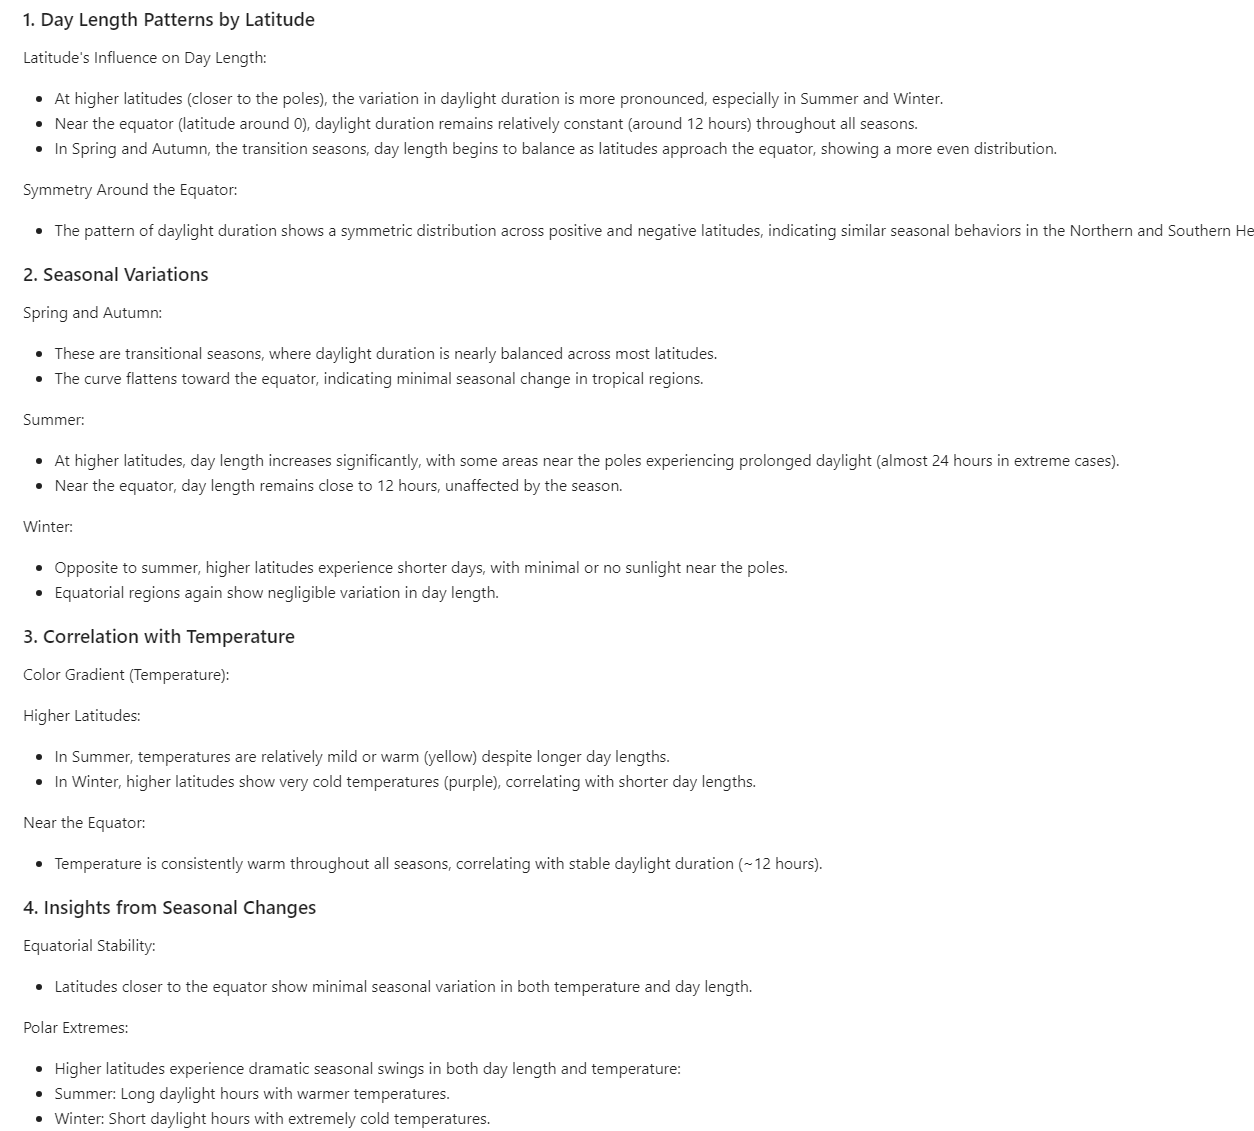

#### ***8- How does moon illumination percentage vary with different moon phases over time across continents?***

In [69]:

from plotly.subplots import make_subplots


# Get unique moon phases
unique_moon_phases = data['moon_phase'].unique()

# Create a base figure for the dropdown
fig = go.Figure()

# Add a trace for each moon phase but make them invisible initially
for phase in unique_moon_phases:
    phase_data = data[data['moon_phase'] == phase]
    fig.add_trace(go.Choropleth(
        locations=phase_data['country'],
        locationmode='country names',
        z=phase_data['moon_illumination'],
        text=phase_data['location_name'],
        colorscale='Twilight',
        colorbar_title="Moon Illumination (%)",
        hoverinfo='location+z+text',
        visible=False,  # Initially, all are invisible
        name=phase
    ))

# Make the first moon phase visible by default
fig.data[0].visible = True

# Create dropdown menu
dropdown_buttons = [
    dict(
        label=phase,
        method="update",
        args=[
            {"visible": [phase == trace.name for trace in fig.data]},  # Toggle visibility
            {"title": f"Moon Illumination for {phase}"}
        ]
    ) for phase in unique_moon_phases
]

# Update layout with dropdown
fig.update_layout(
    title="Moon Illumination by Moon Phase",
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        direction="down",
        showactive=True,
        x=0.1,
        y=1.1,
        bordercolor='#890a0a',
        borderwidth=2,
        bgcolor='#d1e4f7',
        font=dict(size=15, family='PT Sans Narrow',style='italic',weight=600)
    )],
    
)

# Show the figure
fig.show()


### Explanation of the Chart:

This chart represents the variation in **moon illumination percentage** with **different moon phases** across the globe, categorized by continent. 

---

###  **"Waxing Gibbous"**, with moon illumination percentages displayed on a color gradient.

#### 1. **Moon Illumination by Region**
- The map is color-coded to show the **moon illumination percentage** across various continents and countries.
  - **Darker Shades (90%-100%):** Represent regions with higher moon illumination.
  - **Lighter Shades (50%-60%):** Represent regions with lower moon illumination.
- The **"Waxing Gibbous"** phase is typically associated with a moon illumination between **50%-100%**, as the moon transitions toward being fully illuminated (**Full Moon**).

#### 2. **Geographic Trends**
- **Higher Illumination Regions:**
  - Areas closer to the equator and regions with clear skies might display consistently higher illumination.
  - Some areas in Africa, North America, and Asia show relatively darker shades, representing high illumination.
- **Lower Illumination Regions:**
  - Lighter shades in regions such as parts of Europe and northern areas could indicate atmospheric or environmental factors, like cloud cover, affecting the observed moon illumination.

---

#### 3. **Continental Insights**
- The data in the map reflects moon illumination percentages for the **"Waxing Gibbous"** phase, but the illumination pattern can shift with **different moon phases**:
- For this specific phase:
  - Continents closer to the equator (e.g., Africa) appear to have more consistent moon illumination compared to regions in the higher latitudes, where atmospheric variations might reduce visibility.

---

#### 4. **Temporal and Seasonal Influence**
- Although the chart is static for a specific moon phase, over time and across phases:
  - The **illumination percentage** changes predictably as the moon progresses through its cycle.
  - Seasonal variations (e.g., longer nights in winter) might also influence the visibility and prominence of moonlight in different regions.

---




### According to selected option, map visualizes **moon illumination percentage** globally during the **Full Moon** phase. The color gradient represents the level of illumination, where **darker shades indicate higher illumination percentages**, nearing 100%.

1. **Global Uniformity of Full Moon Illumination**:
   - The map shows that during the **Full Moon phase**, moon illumination percentages across the globe are nearly identical and uniformly high (98% - 100%).
   - The darker purple shade dominates most of the map, emphasizing that the Full Moon provides maximum illumination irrespective of geographic location.

2. **Minor Variations in Illumination**:
   - Although the Full Moon phase ensures almost complete illumination, slight variations in illumination levels (as seen in some lighter regions) could result from:
     - Atmospheric conditions affecting the observation of moonlight (e.g., cloud cover, air pollution).
     - Geographic factors like altitude, which influence visibility.

3. **Full Moon Phase Characteristics**:
   - This phase occurs when the Moon is positioned **opposite the Sun relative to Earth**, allowing the Sun’s light to fully illuminate the Moon's surface visible from Earth.
   - The Full Moon phase typically marks the brightest nights of the lunar cycle, significantly influencing nighttime visibility and activities.

---

### Correlation Across Continents:
- Variations might not relate directly to the moon phase but could depend on **regional atmospheric conditions** or **seasonal differences** in cloud cover and visibility.

---

### According to selected option:

This chart represents **moon illumination percentages** globally during the **First Quarter phase** of the lunar cycle. The color gradient on the map reflects the **moon illumination percentage** for each region, with darker shades representing higher illumination values (closer to 50%) and lighter shades representing lower values (closer to 38%).

---

1. **Illumination Levels in the First Quarter Phase**:
   - During the **First Quarter phase**, the Moon appears half-illuminated from Earth, with illumination percentages ranging between **38% to 50%** globally.
   - Regions such as **Asia and Australia** are marked by darker colors, showing higher moon illumination percentages nearing **50%**.
   - **North and South America** exhibit lighter tones, indicating lower illumination percentages closer to **38% to 42%**.

2. **Continental Variations**:
   - **Asia and Oceania** show the highest illumination levels, likely due to clear atmospheric conditions or lunar visibility during this phase in these regions.
   - **North America and parts of Europe** show slightly lower illumination percentages compared to other continents.

3. **Global Distribution**:
   - The chart suggests a **gradual variation in illumination percentages** across the globe, which could be influenced by geographic factors, viewing conditions, or minor observational variances.

---
- Illumination levels are **uniformly distributed globally**, but some regional differences arise due to atmospheric and observational factors.

---


#### According to selected option::

This chart represents **moon illumination percentages** globally during the **Last Quarter phase** of the lunar cycle. The color gradient reflects the **percentage of moon illumination**, with darker shades (purple) representing higher illumination percentages (closer to **60%**) and lighter shades (blue to beige) indicating lower percentages (closer to **50%**).

---

1. **Illumination Levels in the Last Quarter Phase**:
   - During the **Last Quarter**, the Moon's illumination decreases to around **50%-60%**, showing only half of the lunar disk visible.
   - **North and South America** show the darkest shades, indicating illumination values nearing **60%**, while **Asia, Europe, and Africa** exhibit lighter colors, with percentages closer to **50%-55%**.

2. **Continental Patterns**:
   - **South America** and **North America** have consistently higher illumination percentages during this phase.
   - **Africa, Europe, and Asia** have slightly lower illumination, suggesting variability in viewing conditions or lunar alignment relative to those regions.

3. **Geographic Variations**:
   - **Oceania** (Australia and nearby regions) displays moderate illumination levels, falling between **52%-58%**.
   - **Africa** shows distinct variations across regions, with northern and central Africa having relatively higher percentages compared to southern parts.

---

### Context in the Lunar Cycle:
- The **Last Quarter phase** occurs when the Moon is transitioning to the **Waning Crescent**, with the visible illuminated portion decreasing gradually.
- The chart shows a generally uniform global distribution of illumination, but atmospheric and observational factors might cause slight variations across continents.

---

The **Last Quarter phase** demonstrates a clear global pattern of moon illumination, with **North and South America** exhibiting higher percentages compared to **Asia, Europe, and Africa**. This phase marks the Moon's progression toward the **New Moon**, and the chart reflects how illumination subtly varies geographically, likely due to lunar orientation and atmospheric conditions.

#### ***9-How do different air quality metrics (CO, NO2, O3) correlate with visibility levels?***

In [70]:
data['visibility_km']

0        10.0
1        10.0
2        10.0
3         2.0
4        10.0
         ... 
49691    10.0
49692    10.0
49693    10.0
49694    10.0
49695    10.0
Name: visibility_km, Length: 49696, dtype: float64

In [71]:
data.columns


Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'continent', 'season', 'timezone_utc', 'precip_mm_log', 'sunrise_time',
       'sunset_time', 'daylight_duration', 'normalized_temperature'],
      dtype='object')

In [72]:
melted_data=data.melt(id_vars=['visibility_km','continent'],
                     value_vars=['air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide'],
                     var_name='Air Quality metrics',
                     value_name='Concentration')
melted_data

,visibility_km,continent,Air Quality metrics,Concentration
0,10.0,Asia,air_quality_Carbon_Monoxide,277.000
1,10.0,Europe,air_quality_Carbon_Monoxide,193.600
2,10.0,Africa,air_quality_Carbon_Monoxide,540.700
3,2.0,Europe,air_quality_Carbon_Monoxide,170.200
4,10.0,Africa,air_quality_Carbon_Monoxide,2964.000
...,...,...,...,...
198779,10.0,South America,air_quality_Sulphur_dioxide,3.885
198780,10.0,Asia,air_quality_Sulphur_dioxide,33.300
198781,10.0,Asia,air_quality_Sulphur_dioxide,1.480
198782,10.0,Africa,air_quality_Sulphur_dioxide,0.925


In [73]:
fig=px.scatter(melted_data,
              x='Concentration',
              y='visibility_km',
              color='Air Quality metrics',
               title='Correlation between Air Quality Metrics and Visibility Levels',
                animation_frame='continent',

               labels={
                   'Concentration': 'Air Quality Concestration (µg/m³)',
                   'visibility_km': 'Visibility (km)',
                   'Air Quality Metric': 'Metric'
               },
               opacity=0.7,
               trendline='ols',
                trendline_scope='trace'
              )

for trace in fig.data:
    if trace.mode == 'lines':  # For trendlines
        trace.line.color = 'black'
        trace.line.dash = 'solid'
    elif trace.mode == 'markers':  # For points
        trace.marker.size = 8
        trace.marker.opacity = 0.8

# Add dropdown menu for controlling the visibility of legend items
dropdown_buttons = [
    dict(label="Show All",
         method="update",
         args=[{"visible": [True] * len(fig.data)}]),
    dict(label="Hide All",
         method="update",
         args=[{"visible": [False] * len(fig.data)}]),
]

# Add individual dropdown options for each air quality metric
metrics = melted_data['Air Quality metrics'].unique()
for metric in metrics:
    dropdown_buttons.append(
        dict(label=f"Show {metric}",
             method="update",
             args=[{
                 "visible": [(trace.name == metric) or (trace.name == f"{metric} trendline")
                             for trace in fig.data]
             }])
    )

# Update layout with dropdown menu
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        direction="down",
        showactive=True,
        x=0,
        y=0,
        bordercolor='#890a0a',
        borderwidth=2,
        bgcolor='#f08080',
        font=dict(size=10, family='PT Sans Narrow',style='italic',weight=600)
    )],
    margin=dict(l=20, r=20, t=50, b=20),
    legend_title="Air Quality Metric",
    xaxis_title="Concentration (µg/m³)",
    yaxis_title="Visibility (km)",
    showlegend=False,
    height=800
)
fig.show()

### Explanation of the Chart:

This chart investigates the **correlation between air quality metrics (e.g., CO, NO₂, O₃)** and **visibility levels** across different continents.

---

First we  selected  **Asia** and Carbon monoxide. The x-axis represents the **air quality concentration (in µg/m³)**, while the y-axis represents the **visibility levels (in km)**. A trend line (OLS regression) highlights the relationship between these two variables.

1. **Negative Correlation**:
   - The **OLS trendline** shows a slight negative slope, indicating a weak inverse relationship between **air quality concentration** and **visibility**.
   - This means that as the concentration of air pollutants (like CO in this case) increases, visibility tends to decrease, though the correlation (R² ≈ 0.016) is weak.

2. **Air Quality Metrics in Focus**:
   - The chart currently focuses on **Carbon Monoxide (CO)** as the air quality metric. 
   - **Carbon Monoxide** is a key pollutant contributing to poor air quality, particularly in urban areas.

3. **Data Points for Asia**:
   - The scatter plot highlights data from the **Asian continent**, showing high variability in visibility levels (ranging from near zero to over 15 km) even at low pollutant concentrations.
   - Certain areas with extremely high pollutant concentrations (>10,000 µg/m³) correspond to very low visibility levels (<5 km).


---

### Insights for the Question:

- **CO and Visibility**:
   - **Carbon Monoxide** concentrations show a weak negative correlation with visibility in Asia, but the effect is not strong. This could be due to the influence of other pollutants or atmospheric conditions.


---
### Conclusion:
This chart suggests a slight decrease in visibility as CO concentrations increase, but the relationship is not strong. 

### Ozone and Asia Selected:

This chart explores the relationship between **ozone concentration (O₃)** and **visibility levels** within the continent of **Asia**, responding to the question: 

---

1. **OLS Trendline**:
   - The trendline equation is displayed as:  
     **visibility_km = 0.00191122 * Concentration + 9.18027**
   - The slope of the trendline is **positive**, but it is almost flat, indicating a **very weak positive correlation** between ozone concentration and visibility levels.
   - The **R² value** is **0.002994**, suggesting that ozone concentration explains less than **0.3%** of the variability in visibility.

3. **Distribution of Data Points**:
   - Most data points cluster at lower ozone concentrations (<100 µg/m³) with visibility levels around **5-10 km**.
   - There are a few outliers with higher ozone concentrations (200-500 µg/m³) but with no significant decrease in visibility.

4. **Comparative Insights**:
   - Unlike some pollutants such as **Carbon Monoxide (CO)**, where higher concentrations may decrease visibility, ozone appears to have a negligible effect on visibility in this dataset.
   - This is consistent with ozone being a secondary pollutant that does not directly contribute to particulate matter, which is a key driver of reduced visibility.

5. **Regional Context (Asia)**:
   - This chart specifically analyzes Asia, where factors such as geographic variation, industrial emissions, and weather patterns may influence the weak correlation between ozone and visibility.

---

### Insights for the Question:

1. **Correlation Between Ozone and Visibility**:
   - Ozone shows an almost negligible correlation with visibility levels. The flat trendline indicates that ozone concentrations alone do not significantly impact visibility in the data.

---

### Conclusion:
This chart highlights that **ozone concentration has a minimal impact on visibility levels in Asia**, as evidenced by the weak positive correlation and the low R² value. 

### Nitrogen dioxide and Asia was selected:

This chart visualizes the relationship between **nitrogen dioxide (NO₂) concentration** and **visibility levels** within the continent of **Asia**.



1. **OLS Trendline**:
   - The trendline equation is:  
     **visibility_km = -0.00320922 * Concentration + 9.41446**  
     - This indicates a **negative correlation** between NO₂ concentration and visibility.
     - The slope is **slightly negative**, suggesting that as NO₂ concentration increases, visibility tends to decrease.
   - The **R² value is 0.0047**, which means only **0.47% of the variability in visibility** can be explained by NO₂ concentration. This indicates a **very weak relationship**.

2. **Distribution of Data Points**:
   - Most data points cluster around lower NO₂ concentrations (<50 µg/m³), with visibility levels predominantly ranging between **5-10 km**.
   - Outliers with higher NO₂ concentrations (>200 µg/m³) exhibit a slight decrease in visibility, but the overall trend is not pronounced.

3. **Impact of NO₂ on Visibility**:
   - NO₂, being a precursor to particulate matter and ozone formation, can contribute to haze and reduced visibility. However, the weak correlation in this chart suggests that NO₂ alone may not be the primary factor affecting visibility in the data.

5. **Context (Asia)**:
   - Asia, with its diverse environments and pollution sources, shows variation in NO₂ concentration and visibility. However, the weak trend indicates that other pollutants or factors (e.g., particulate matter, humidity) likely play a more dominant role in reducing visibility.

---

### Insights for the Question:

1. **Correlation Between NO₂ and Visibility**:
   - A **weak negative correlation** is observed, where increasing NO₂ concentration slightly decreases visibility. This is supported by the nearly flat slope of the trendline.

2. **Role of NO₂ in Visibility Reduction**:
   - While NO₂ can indirectly contribute to visibility reduction through its role in secondary pollutant formation, its direct impact appears minimal in this dataset.

3. **Comparison to Other Pollutants**:
   - Compared to pollutants like CO or particulate matter, NO₂ appears to have a weaker influence on visibility levels in this analysis.

---

### Conclusion:

The chart highlights a **weak negative correlation** between NO₂ concentration and visibility levels in Asia. While NO₂ might indirectly impact visibility by contributing to haze formation, its standalone effect appears limited in this dataset. 
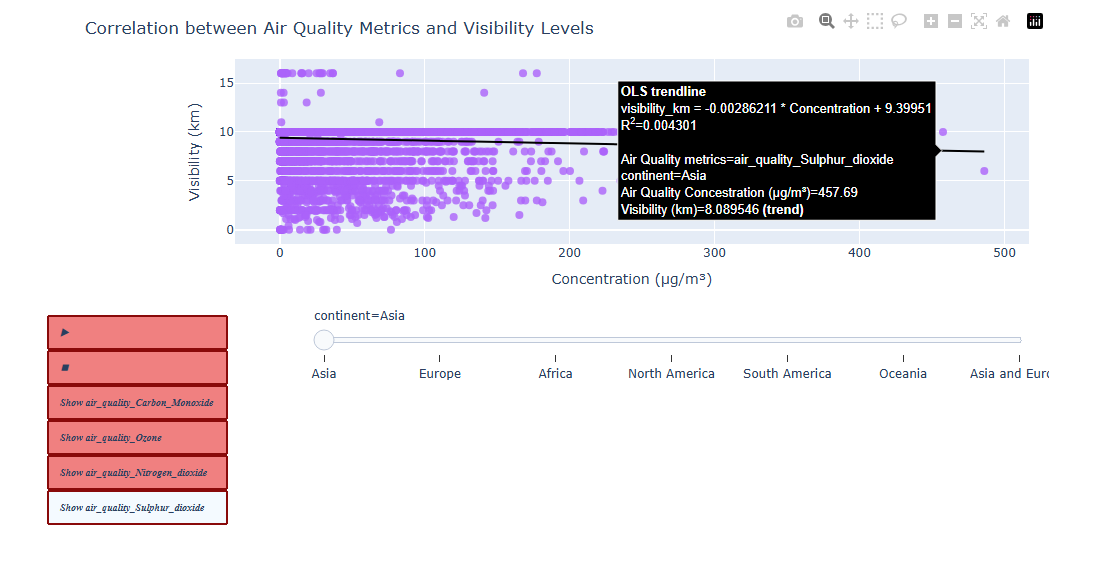

### sulfur dioxide and asia was selected:

This chart visualizes the relationship between **sulfur dioxide (SO₂) concentration** and **visibility levels** in **Asia**, addressing the question:


1. **OLS Trendline**:
   - The trendline equation is:  
     **visibility_km = -0.00286211 * Concentration + 9.39951**  
     - This suggests a **negative correlation** between SO₂ concentration and visibility.
     - As SO₂ concentration increases, visibility slightly decreases.
   - The **R² value is 0.004301**, indicating that **only 0.43% of the variation in visibility** can be explained by SO₂ concentration. This points to a **very weak correlation**.

2. **Distribution of Data Points**:
   - The majority of data points cluster at **lower SO₂ concentrations** (<50 µg/m³), with visibility typically ranging between **5-10 km**.
   - Higher SO₂ concentrations (>200 µg/m³) show a minor decrease in visibility, but the overall trend is not strongly defined.

3. **Impact of SO₂ on Visibility**:
   - SO₂ can contribute to the formation of particulate matter and acid aerosols, which can reduce visibility. However, the weak correlation observed here suggests that SO₂ concentration alone is not a major determinant of visibility.

4. **Context (Asia)**:
   - Asia, with diverse sources of air pollution, exhibits varying SO₂ concentrations. The weak trend suggests that other pollutants (e.g., particulate matter, NO₂) may play a more significant role in visibility reduction.

---

### Insights for the Question:

1. **Correlation Between SO₂ and Visibility**:
   - There is a **very weak negative correlation** between SO₂ concentration and visibility. While higher SO₂ concentrations are associated with slightly reduced visibility, the impact is minimal.

2. **Role of SO₂ in Visibility Reduction**:
   - While SO₂ may indirectly affect visibility by forming secondary pollutants, its direct influence appears limited based on this dataset.

3. **Comparison to Other Metrics**:
   - Compared to other air quality metrics like NO₂ or CO, SO₂ also shows a weak impact on visibility in this analysis.

---

### Conclusion:

The chart indicates a **weak negative correlation** between SO₂ concentration and visibility levels in Asia. While SO₂ might contribute to visibility reduction indirectly, its standalone effect appears limited.


**Concentration values are capped at the 99th percentile, removing extreme outliers.
This results in a tighter range of points and eliminates extreme values, making the chart more representative of general trends**


In [74]:
data_cleaned_99 = melted_data[
    (melted_data['Concentration'] >= 0) &  
    (melted_data['Concentration'] <= melted_data['Concentration'].quantile(0.99)) &  
    (melted_data['visibility_km'] <= melted_data['visibility_km'].quantile(0.99)) 
]

fig=px.scatter(data_cleaned_99,
              x='Concentration',
              y='visibility_km',
              color='Air Quality metrics',
                               animation_frame='continent',

               title='Correlation between Air Quality Metrics and Visibility Levels',
               labels={
                   'Concentration': 'Air Quality Concestration (µg/m³)',
                   'visibility_km': 'Visibility (km)',
                   'Air Quality Metric': 'Metric'
               },
               opacity=0.7,
               trendline='ols',
                trendline_scope='trace'
              )

for trace in fig.data:
    if trace.mode == 'lines':  # For trendlines
        trace.line.color = 'black'
        trace.line.dash = 'solid'
    elif trace.mode == 'markers':  # For points
        trace.marker.size = 8
        trace.marker.opacity = 0.8

# Add dropdown menu for controlling the visibility of legend items
dropdown_buttons = [
    dict(label="Show All",
         method="update",
         args=[{"visible": [True] * len(fig.data)}]),
    dict(label="Hide All",
         method="update",
         args=[{"visible": [False] * len(fig.data)}]),
]

# Add individual dropdown options for each air quality metric
metrics = data_cleaned_99['Air Quality metrics'].unique()
for metric in metrics:
    dropdown_buttons.append(
        dict(label=f"Show {metric}",
             method="update",
             args=[{
                 "visible": [(trace.name == metric) or (trace.name == f"{metric} trendline")
                             for trace in fig.data]
             }])
    )

# Update layout with dropdown menu
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        direction="down",
        showactive=True,
        x=1.05,
        y=1,
        bordercolor='#890a0a',
        borderwidth=2,
        bgcolor='#f08080',
        font=dict(size=15, family='PT Sans Narrow',style='italic')
    )],
    margin=dict(l=20, r=20, t=50, b=20),
    legend_title="Air Quality Metric",
    xaxis_title="Concentration (µg/m³)",
    yaxis_title="Visibility (km)",
    showlegend=False,
    height=900
)
fig.show()


**Concentration values are capped at the 95th percentile, removing extreme outliers.
This results in a tighter range of points and eliminates extreme values, making the chart more representative of general trends**

In [75]:
data_cleaned_95 = melted_data[
    (melted_data['Concentration'] >= 0) &  # Remove negative concentrations
    (melted_data['Concentration'] <= melted_data['Concentration'].quantile(0.95)) &  # Keep below the 95th percentile
    (melted_data['visibility_km'] <= melted_data['visibility_km'].quantile(0.95))  # Keep below the 95th percentile
]

fig=px.scatter(data_cleaned_95,
              x='Concentration',
              y='visibility_km',
              color='Air Quality metrics',
            animation_frame='continent',

               title='Correlation between Air Quality Metrics and Visibility Levels',
               labels={
                   'Concentration': 'Air Quality Concestration (µg/m³)',
                   'visibility_km': 'Visibility (km)',
                   'Air Quality Metric': 'Metric'
               },
               opacity=0.7,
               trendline='ols',
                trendline_scope='trace'
              )

for trace in fig.data:
    if trace.mode == 'lines':  # For trendlines
        trace.line.color = 'black'
        trace.line.dash = 'solid'
    elif trace.mode == 'markers':  # For points
        trace.marker.size = 8
        trace.marker.opacity = 0.8

# Add dropdown menu for controlling the visibility of legend items
dropdown_buttons = [
    dict(label="Show All",
         method="update",
         args=[{"visible": [True] * len(fig.data)}]),
    dict(label="Hide All",
         method="update",
         args=[{"visible": [False] * len(fig.data)}]),
]

# Add individual dropdown options for each air quality metric
metrics = data_cleaned_95['Air Quality metrics'].unique()
for metric in metrics:
    dropdown_buttons.append(
        dict(label=f"Show {metric}",
             method="update",
             args=[{
                 "visible": [(trace.name == metric) or (trace.name == f"{metric} trendline")
                             for trace in fig.data]
             }])
    )

# Update layout with dropdown menu
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        direction="down",
        showactive=True,
        x=1,
        y=1,
        bordercolor='#890a0a',
        borderwidth=2,
        bgcolor='#f08080',
        font=dict(size=10, family='PT Sans Narrow',style='italic',weight=600)
    )],
    margin=dict(l=20, r=20, t=50, b=20),
    legend_title="Air Quality Metric",
    xaxis_title="Concentration (µg/m³)",
    yaxis_title="Visibility (km)",
    showlegend=False,
        height=900

)
fig.show()

#### For Asia
##### Carbon Monoxide (CO): Slight negative correlation; higher CO concentrations are associated with reduced visibility, but the trend is still weak (low R²).

##### Ozone (O₃): Almost no correlation; the trend line remains flat, indicating that O₃ concentration has little effect on visibility.

##### Nitrogen Dioxide (NO₂) and Sulphur Dioxide (SO₂): Slight negative correlations are visible, suggesting that these pollutants mildly affect visibility.

#### For Europe

Carbon Monoxide (CO):

The concentration of Carbon Monoxide (measured in µg/m³) shows a weak negative correlation with visibility levels. As the CO concentration increases, visibility tends to decrease slightly.
The trend line's negative slope indicates that higher levels of CO are generally associated with lower visibility, but the R² value is very low, suggesting a weak predictive relationship.

Ozone (O₃):

The relationship between Ozone concentration and visibility is slightly positive in Europe.
A positive trend in the trend line implies that higher Ozone concentrations could be associated with slightly better visibility in certain regions. However, the overall R² value is still quite small, indicating limited strength in this correlation.

Nitrogen Dioxide (NO₂):

A strong negative correlation is evident between NO₂ concentrations and visibility levels.
The steep negative slope of the trend line highlights that higher NO₂ concentrations are strongly associated with reduced visibility. This is consistent with the fact that NO₂ contributes significantly to haze and particulate formation in the atmosphere.

Sulfur Dioxide (SO₂):

Similar to Nitrogen Dioxide, Sulfur Dioxide shows a negative correlation with visibility.
The trend line demonstrates that higher SO₂ concentrations correlate with diminished visibility. SO₂ is a known contributor to atmospheric haze and acid rain, which significantly impact visibility.

#### ***10. Which locations are most sensitive to atmospheric pressure changes?***

In [76]:
data.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination',
       'continent', 'season', 'timezone_utc', 'precip_mm_log', 'sunrise_time',
       'sunset_time', 'daylight_duration', 'normalized_temperature'],
      dtype='object')

In [77]:
print(dir(fig.add_trace))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [78]:
import random



city_pressure_data = data[['location_name', 'pressure_mb']]

cities = city_pressure_data['location_name'].unique()
colors = [f"rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})" for _ in cities]


city_traces = [
    go.Box(
        y=city_pressure_data[city_pressure_data['location_name'] == city]['pressure_mb'],
        name=city,
        marker_color=colors[idx], 
        opacity=0.8,
        visible=(idx == 0)  
    )
    for idx, city in enumerate(cities)
]

fig = go.Figure(data=city_traces)

city_buttons = [
    {
        "label": city,
        "method": "update",
        "args": [
            {"visible": [i == idx for i in range(len(city_traces))]},  # Show only the selected city's trace
            {"title": f"Pressure Distribution for {city}"}
        ],
    }
    for idx, city in enumerate(cities)
]

fig.update_layout(
    updatemenus=[
        {
            "buttons": city_buttons,
            "direction": "down",
            "x": 1,
            "y": 1,
            "showactive": True,
            'bordercolor':'#890a0a',
            'borderwidth':2,
            'bgcolor':'#faebd7',
            'font':dict(size=20, family='PT Sans Narrow',style='italic',weight=600)
        }
    ],
    title=f"Pressure Distribution for {cities[0]}",
    xaxis_title="Cities",
    yaxis_title="Pressure (mb)",
    height=600,
)

fig.show()


The box plots above analyze atmospheric pressure distributions 
there were lots of cities so we selected two cities which are in different continent: **Beijing** and **Berlin**, focusing on understanding their sensitivity to atmospheric pressure changes. 

---

### **1. Beijing:**
- **Median Pressure:** Approximately **1015.5 mb**, indicating the central tendency of atmospheric pressure values.
- **Interquartile Range (IQR):** Spanning from the first quartile (**1006 mb**) to the third quartile (**1023 mb**). This range reflects the typical pressure variations.
- **Outliers:** None observed in this box plot, suggesting that Beijing's atmospheric pressure is generally stable and within expected ranges.
- **Range of Values:** 
  - **Minimum Pressure:** **992 mb** (Lower fence)
  - **Maximum Pressure:** **1039 mb** (Upper fence)
  - These values suggest that Beijing experiences a relatively narrow range of atmospheric pressures.

- Beijing's atmospheric pressure is fairly consistent with limited variability. Its lack of outliers implies that it is not particularly sensitive to significant atmospheric pressure changes, staying within predictable limits.

---

### **2. Berlin:**
- **Median Pressure:** Approximately **1015 mb**, slightly lower than Beijing.
- **Interquartile Range (IQR):** From **1010 mb** (Q1) to **1022 mb** (Q3). The IQR here is marginally smaller compared to Beijing, but the data range extends further.
- **Outliers:** Observed below the lower whisker (below **994 mb**). These suggest Berlin occasionally experiences more extreme drops in atmospheric pressure, indicating greater variability or sensitivity.
- **Range of Values:** 
  - **Minimum Pressure:** **990 mb** (Lower bound with outliers)
  - **Maximum Pressure:** **1044 mb** (Upper bound)
  - The wider range (from 990 mb to 1044 mb) compared to Beijing reflects greater sensitivity to atmospheric pressure changes.

- Berlin shows a wider range of atmospheric pressures and includes outliers, suggesting it is more sensitive to fluctuations in atmospheric pressure compared to Beijing.

---

### **Conclusion:**

- **Beijing** has a more stable atmospheric pressure pattern, with fewer extremes.
- **Berlin** exhibits greater variability, with occasional outliers indicating sensitivity to atmospheric pressure changes. This variability could be influenced by its geographic location or prevailing meteorological conditions.

Thus, **Berlin** appears to be more sensitive to atmospheric pressure changes compared to **Beijing**.

#### By using histogram 

In [79]:

import random

city_pressure_data = data[['location_name', 'pressure_mb']]

cities = city_pressure_data['location_name'].unique()
colors = [f"rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})" for _ in cities]

city_traces = [
    go.Histogram(
        x=city_pressure_data[city_pressure_data['location_name'] == city]['pressure_mb'],
        name=city,
        visible=(idx == 0),
        marker_color=colors[idx], 
        opacity=0.8
    )
    for idx, city in enumerate(cities)
]

fig = go.Figure(data=city_traces)

city_buttons = [
    {
        "label": city,
        "method": "update",
        "args": [
            {"visible": [i == idx for i in range(len(city_traces))]},  
            {"title": f"Pressure Distribution for {city}"}
        ],
    }
    for idx, city in enumerate(cities)
]

fig.update_layout(
    updatemenus=[
        {
            "buttons": city_buttons,
            "direction": "down",
            "x": 1,
            "y": 1,
            "showactive": True,
            'bordercolor':'#890a0a',
            'borderwidth':2,
            'bgcolor':'#faebd7',
            'font':dict(size=20, family='PT Sans Narrow',style='italic',weight=600)
        }
    ],
    title=f"Pressure Distribution for {cities[0]}",
    xaxis_title="Cities",
    yaxis_title="Pressure (mb)",
    height=600,
)

fig.show()


#### Histograms for Praia and Suva: which are at different continent

- Praia:

    - The histogram shows a narrow pressure distribution, with most values concentrated between 1010 mb and 1016 mb.
    - The peak occurs near 1014 mb.
    - Sensitivity to Pressure Changes: Praia has a more stable pressure profile, indicating minimal sensitivity to atmospheric pressure changes.


- Suva:

    -The pressure distribution for Suva is more varied, with pressure values spanning a broader range from around 1006 mb to 1020 mb.
    - The histogram shows multiple peaks, indicating significant fluctuations.
    - Sensitivity to Pressure Changes: Suva appears more sensitive to atmospheric pressure variations due to its wider range and irregular distribution.

In [80]:
continent_pressure_data = data[['continent', 'pressure_mb']]
continent_pressure_data


,continent,pressure_mb
0,Asia,1012.0
1,Europe,1012.0
2,Africa,1011.0
3,Europe,1007.0
4,Africa,1011.0
...,...,...
49691,South America,1013.0
49692,Asia,1020.0
49693,Asia,1013.0
49694,Africa,1010.0


In [81]:
continents = continent_pressure_data['continent'].unique()
continents

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', 'Asia and Europe'], dtype=object)

In [82]:
import plotly.graph_objects as go
import random

# Prepare data for continents
continent_pressure_data = data[['continent', 'pressure_mb']]

# Get the unique continents
continents = continent_pressure_data['continent'].unique()

# Generate random colors for each continent
colors = [f"rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})" for _ in continents]

# Create traces for each continent with unique colors
continent_traces = [
    go.Box(
        y=continent_pressure_data[continent_pressure_data['continent'] == continent]['pressure_mb'],
        name=continent,
        marker_color=colors[idx],  # Assign unique color
        visible=(idx == 0)  # Only the first continent is visible initially
    )
    for idx, continent in enumerate(continents)
]

# Add all traces to the figure
fig = go.Figure(data=continent_traces)

# Create a dropdown menu for selecting continents
continent_buttons = [
    {
        "label": continent,
        "method": "update",
        "args": [
            {"visible": [i == idx for i in range(len(continent_traces))]},  
            {"title": f"Pressure Distribution for {continent}"}
        ],
    }
    for idx, continent in enumerate(continents)
]

# Update layout with the dropdown menu
fig.update_layout(
    updatemenus=[
        {
            "buttons": continent_buttons,
            "direction": "down",
            "x": 1,
            "y": 1,
            "showactive": True,
        }
    ],
    title=f"Pressure Distribution for {continents[0]} ",
    xaxis_title="Continents",
    yaxis_title="Pressure (mb)",
    height=600,
)

# Show the figure
fig.show()



### Analysis of Box Plots for Atmospheric Pressure by Continent:

1. **Asia**:
   - **Range**: Asia shows the broadest range of pressures, with a maximum of **1080 mb** and a minimum of **984 mb**, indicating significant variability.
   - **Median**: The median pressure is **1010 mb**, showing central atmospheric stability.
   - **Interquartile Range (IQR)**: The IQR spans from **1006 mb** (Q1) to **1015 mb** (Q3), covering a moderate spread of common atmospheric conditions.
   - **Outliers**: Numerous outliers, especially on the high-pressure end, suggest that Asia experiences frequent extreme atmospheric events, likely influenced by its diverse topography and climate systems (e.g., high plateaus, deserts, and monsoons).
   - **Interpretation**: Asia's atmospheric pressure is dynamic, reflecting its geographical diversity and exposure to different weather systems.

2. **Europe**:
   - **Range**: The range is narrower compared to Asia, with a maximum pressure of **1044 mb** and a minimum of **964 mb**.
   - **Median**: The median pressure is **1015 mb**, slightly higher than Asia's, indicating stable atmospheric conditions.
   - **IQR**: The IQR is from **1011 mb** (Q1) to **1022 mb** (Q3), showing a more compact and consistent pressure distribution.
   - **Outliers**: Europe has fewer outliers than Asia, indicating less frequent extreme atmospheric pressure events.
   - **Interpretation**: Europe exhibits a stable atmospheric pattern, likely due to its temperate climate and lack of extreme geographic variations.

3. **Africa**:
   - **Range**: Africa shows a moderate range, with pressures between **998 mb** and **1040 mb**.
   - **Median**: The median pressure is **1014 mb**, close to Europe’s, signifying relatively stable conditions.
   - **IQR**: The IQR spans from **1012 mb** (Q1) to **1016 mb** (Q3), showing even narrower variability compared to Europe.
   - **Outliers**: A few high-pressure outliers suggest occasional pressure spikes, possibly linked to desert regions like the Sahara.
   - **Interpretation**: Africa generally has stable atmospheric conditions, influenced by its equatorial and subtropical climate zones.

4. **North America**:
   - **Range**: North America exhibits a wide range of pressures, from **978 mb** to **1046 mb**, showing significant variability.
   - **Median**: The median pressure is **1014 mb**, consistent with Africa.
   - **IQR**: The IQR is from **1012 mb** (Q1) to **1016 mb** (Q3), similar to Africa, indicating a stable core range.
   - **Outliers**: Several low-pressure outliers suggest occasional storm systems (e.g., hurricanes or winter storms).
   - **Interpretation**: North America has variable atmospheric conditions, influenced by large storm systems and diverse geography.

5. **South America**:
   - **Range**: The range is comparable to North America, with pressures between **998 mb** and **1045 mb**.
   - **Median**: The median is **1014 mb**, in line with Africa and North America.
   - **IQR**: The IQR spans **1011 mb** (Q1) to **1017 mb** (Q3), indicating a slightly broader variability than Africa.
   - **Outliers**: A few outliers, primarily at the high-pressure end, suggest sporadic atmospheric events.
   - **Interpretation**: South America shows moderate sensitivity, influenced by tropical weather systems and its proximity to the Andes Mountains.

6. **Oceania**:
   - **Range**: Oceania has pressures ranging from **989 mb** to **1040 mb**, reflecting relatively stable conditions.
   - **Median**: The median is **1011 mb**, slightly lower than other continents, indicating overall lower pressure.
   - **IQR**: The IQR spans **1009 mb** (Q1) to **1014 mb** (Q3), reflecting a narrow and consistent pressure distribution.
   - **Outliers**: Outliers on both the high and low ends indicate occasional extreme weather events like cyclones.
   - **Interpretation**: Oceania generally experiences stable atmospheric conditions, with occasional extremes due to its tropical and oceanic influences.

7.**Asia and Europe (cross-continental countries):**

- **Range**:The atmospheric pressure ranges from **987 mb** to **1037 mb**, which is narrower compared to Asia alone but similar to Europe.This indicates less extreme variability in atmospheric pressure for cross-continental countries.
- **Median**: The median pressure is **1015 mb**, consistent with Europe’s median.This central value suggests stable atmospheric conditions in these regions, similar to Europe’s general pressure trends.
- **Interquartile Range (IQR)**:The IQR spans from **1011 mb** (Q1) to **1021 mb** (Q3), showing moderate variability.This narrower spread implies more stable weather conditions, as these regions experience temperate climates with fewer extreme weather systems compared to tropical regions.
- **Outliers**:Outliers are minimal, with a few on the lower-pressure side, reflecting occasional storm systems or specific weather events.These outliers are less frequent and extreme compared to Asia, suggesting that cross-continental regions benefit from more temperate conditions.
-**Interpretation**:Countries like Turkey and Russia experience mixed climatic effects due to their large geographic spans. Turkey’s Mediterranean and continental climates and Russia’s vast temperate to arctic zones likely moderate pressure fluctuations compared to Asia.The distribution suggests that these regions are less sensitive to extreme pressure variability than Asia alone. They share Europe’s relative atmospheric stability while exhibiting minor influences from Asia's dynamic weather systems.
atmospheric pressure changes, with less extreme events compared to Asia but slightly more variability than Europe alone.

### Summary:
- **Asia** demonstrates the greatest sensitivity to atmospheric pressure changes due to its wide range, numerous outliers, and diverse weather systems.
- **Europe** and **Africa** are relatively stable, with narrower pressure ranges and fewer outliers.
- **North America and South America** show moderate variability, influenced by their dynamic weather systems.
- **Oceania** has the narrowest range, reflecting stable conditions but with some extreme outliers due to tropical systems.
- **Asia and Europe (Cross-Continental)**: Falls in between Asia and Europe, with moderate variability, fewer outliers, and a narrower range than Asia but slightly broader than Europe.

In [83]:
import plotly.graph_objects as go
import random

# Prepare data for continents
continent_pressure_data = data[['continent', 'pressure_mb']]

# Get the unique continents
continents = continent_pressure_data['continent'].unique()

# Generate random colors for each continent
colors = [f"rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})" for _ in continents]

# Create traces for each continent with unique colors
continent_traces = [
    go.Histogram(
        x=continent_pressure_data[continent_pressure_data['continent'] == continent]['pressure_mb'],
        name=continent,
        marker_color=colors[idx],  # Assign unique color
        visible=(idx == 0)  # Only the first continent is visible initially
    )
    for idx, continent in enumerate(continents)
]

# Add all traces to the figure
fig = go.Figure(data=continent_traces)

# Create a dropdown menu for selecting continents
continent_buttons = [
    {
        "label": continent,
        "method": "update",
        "args": [
            {"visible": [i == idx for i in range(len(continent_traces))]},  
            {"title": f"Pressure Distribution for {continent}"}
        ],
    }
    for idx, continent in enumerate(continents)
]

# Update layout with the dropdown menu
fig.update_layout(
    updatemenus=[
        {
            "buttons": continent_buttons,
            "direction": "down",
            "x": 1,
            "y": 1,
            "showactive": True,
        }
    ],
    title=f"Pressure Distribution for {continents[0]}",
    xaxis_title="Continents",
    yaxis_title="Pressure (mb)",
    height=600,
)

# Show the figure
fig.show()



####  ***11.Which locations experience extreme combinations of low temperatures and high UV index?***

In [84]:
extreme_conditions_data = data[['location_name', 'temperature_celsius', 'uv_index','country','continent']]

# Create a scatter plot to identify extreme combinations of low temperatures and high UV index
fig = px.scatter(
    extreme_conditions_data,
    x='temperature_celsius',
    y='uv_index',
    color='temperature_celsius',
    hover_name='location_name',
    animation_frame='continent',

    title='Extreme Combinations of Low Temperatures and High UV Index',
    labels={
        'temperature_celsius': 'Temperature (°C)',
        'uv_index': 'UV Index',
    },
    color_continuous_scale='Viridis',
    size_max=15
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Temperature (°C)',
    yaxis_title='UV Index',
    height=600,
)

# Show the figure
fig.show()

The scatter plots represent **extreme combinations of low temperatures and high UV index** for various continents. 

### 1. **Europe**

     - UV index generally remains moderate (around 0-6) even when temperatures drop below freezing (<0°C).
     - A few instances of UV indices greater than 8 occur at temperatures between 20-30°C, indicating some variability.
     - Europe does not experience extreme combinations of low temperatures and high UV index frequently.

### 2. **Africa**
     - High UV indices (>8) are consistently observed across the continent, even at temperatures above 40°C.
     - Low temperatures (<10°C) are relatively rare, and corresponding UV indices in such cases are low (<5).
     - Africa experiences high UV indices, but low temperatures rarely coincide with high UV levels due to its tropical and subtropical climate.

### 3. **Asia**
     - Extreme low temperatures (<-20°C) are observed, with corresponding UV indices staying low (<4).
     - Higher UV indices (>8) occur predominantly at temperatures above 20°C.
     - Asia exhibits extreme low temperatures but does not generally align with high UV indices in such conditions.

### 4. **North America**
     - Similar to Asia, low temperatures (<-20°C) correspond to UV indices <4.
     - High UV levels (>8) are observed at warmer temperatures (15-30°C).
     - North America shows extreme cold but lacks alignment between low temperatures and high UV indices.

### 5. **South America**
     - High UV indices (>8) dominate the data, particularly at temperatures >20°C.
     - Low temperatures (<10°C) correspond to moderate UV indices (<6).
     - South America experiences extreme UV levels but not in combination with low temperatures.

### 6. **Oceania**
     - Low temperatures (<0°C) are rare, with most data concentrated between 10-30°C.
     - UV indices increase significantly (>8) at higher temperatures.
     - Oceania is less prone to low temperatures, and UV indices are high in warmer conditions.

### 7. **Asia and Europe (Countries Spanning Two Continents)**
     - Similar patterns to Asia, with extreme low temperatures (<-20°C) aligning with UV indices <4.
     - High UV indices (>8) occur at temperatures >20°C.
     - Regions like Turkey and Russia, spanning Asia and Europe, experience cold temperatures but rarely show high UV levels in such conditions.

### Conclusion:
   - **Continents like Africa and South America show consistently high UV indices, but extreme combinations of low temperatures and high UV indices are uncommon.**
   - **Regions like Asia and North America exhibit extreme low temperatures but rarely align with high UV indices in such cases.**
   - **The overlap between extreme low temperatures and high UV indices is least common in all continents, emphasizing distinct climatic zones and conditions.**

In [85]:

geo_data = data[['location_name', 'temperature_celsius', 'uv_index', 'latitude', 'longitude']]

fig = px.scatter_geo(
    geo_data,
    lat='latitude',
    lon='longitude',
    color='temperature_celsius',
    size='uv_index',
    hover_data=['temperature_celsius', 'uv_index', 'latitude', 'longitude'],
    hover_name='location_name',
    title='Scatter Geo Map of UV Index for Cities',
    
    labels={
        'temperature_celsius': 'Temperature (°C)',
        'uv_index': 'UV Index',
    },
    color_continuous_scale='BlueRed',
    size_max=15
)

# Update layout for better readability
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="Wheat",
        coastlinecolor="Chocolate",
        projection_type="orthographic",
        showcountries=True, countrycolor="RosyBrown",
        showocean=True, oceancolor="DeepSkyBlue"
    ),
    height=600,
)

# Show the figure
fig.show()


#### ***12.What are the global "optimal conditions" for outdoor activities?***
   - **Visualization**: I used a **radar chart**, combining metrics such as moderate temperatures, low UV index, low wind speeds, and good air quality.
   - **Purpose**: Identify locations that are most suitable for outdoor activities based on combined weather metrics.

In [86]:
columns_to_use = ['temperature_celsius', 'uv_index', 'wind_kph', 'air_quality_PM2.5', 'visibility_km', 'location_name']


In [87]:
optimal_conditions={
    'temperature_celsius':(18,25),
    'uv_index':(0,5),
    'wind_kph':(0,15),
    'air_quality_PM2.5':(0,50),
    'visibility_km':(15,50)
}

In [88]:
def calculate_score(row,conditions):
    score=0
    for metric, (low,high) in conditions.items():
        if low<= row[metric]<=high:
            score+=1
    return score

In [89]:
data['optimal_score']=data.apply(lambda row:calculate_score(row,optimal_conditions),axis=1)

In [90]:
data.shape

(49696, 50)

In [91]:
top_locations = data[
    (data['optimal_score'] == data['optimal_score'].max())
]

In [92]:
top_locations

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,moon_illumination,continent,season,timezone_utc,precip_mm_log,sunrise_time,sunset_time,daylight_duration,normalized_temperature,optimal_score
306,Micronesia,Palikir,6.92,158.15,Pacific/Pohnpei,1715868000,2024-05-17 01:00:00,25.0,77.0,Overcast,...,55,Oceania,Spring,UTC+11:00,0.307485,06:10:00,18:37:00,12.450000,50.8,5
614,Canada,Ottawa,45.42,-75.70,America/Toronto,1716042600,2024-05-18 10:30:00,18.0,64.4,Light rain,...,73,North America,Spring,UTC-05:00,0.300105,05:29:00,20:30:00,15.016667,43.8,5
808,Canada,Ottawa,45.42,-75.70,America/Toronto,1716127200,2024-05-19 10:00:00,18.0,64.4,Sunny,...,81,North America,Spring,UTC-05:00,0.000000,05:28:00,20:32:00,15.066667,43.8,5
1198,Canada,Ottawa,45.42,-75.70,America/Toronto,1716302700,2024-05-21 10:45:00,20.0,68.0,Overcast,...,93,North America,Spring,UTC-05:00,0.000000,05:26:00,20:34:00,15.133333,45.8,5
1641,Japan,Tokyo,35.69,139.69,Asia/Tokyo,1716472800,2024-05-23 23:00:00,20.3,68.5,Partly Cloudy,...,100,Asia,Spring,UTC+09:00,0.000000,04:31:00,18:46:00,14.250000,46.1,5
2031,Japan,Tokyo,35.69,139.69,Asia/Tokyo,1716645600,2024-05-25 23:00:00,18.6,65.5,Overcast,...,98,Asia,Spring,UTC+09:00,0.000000,04:29:00,18:47:00,14.300000,44.4,5
2273,Palau,Meyungs,7.35,134.45,Pacific/Palau,1716732900,2024-05-26 23:15:00,25.0,77.0,Partly Cloudy,...,93,Oceania,Spring,UTC+09:00,0.009950,05:44:00,18:14:00,12.500000,50.8,5
3342,Canada,Ottawa,45.42,-75.70,America/Toronto,1717251300,2024-06-01 10:15:00,21.0,69.8,Partly Cloudy,...,35,North America,Summer,UTC-05:00,0.000000,05:18:00,20:44:00,15.433333,46.8,5
4315,Canada,Ottawa,45.42,-75.70,America/Toronto,1717682400,2024-06-06 10:00:00,22.0,71.6,Overcast,...,0,North America,Summer,UTC-05:00,0.431782,05:15:00,20:48:00,15.550000,47.8,5
4510,Canada,Ottawa,45.42,-75.70,America/Toronto,1717768800,2024-06-07 10:00:00,18.1,64.6,Partly Cloudy,...,0,North America,Summer,UTC-05:00,0.518794,05:15:00,20:49:00,15.566667,43.9,5


In [93]:
radar_data= top_locations.melt(
    id_vars=['location_name'],
    value_vars=['temperature_celsius','uv_index','wind_kph','air_quality_PM2.5','visibility_km'],
    var_name='Metric',
    value_name='Value'
)

In [94]:
fig=px.scatter_polar(
    radar_data,
    r='Value',
    theta='Metric',
    color='location_name',
    title='The Cities are Most Avaliable for Outdoor Activities',
    symbol='location_name'
)
fig.update_traces(fill='toself')
fig.update_layout(polar=dict(
   radialaxis=dict( visible=True,
    range=[0,35])
),
    margin=dict(l=20,r=20,t=50,b=20))
fig.show()

In [95]:
outdoor_cont=data.groupby('continent')[['temperature_celsius', 'uv_index', 'wind_kph', 'air_quality_PM2.5', 'visibility_km']].mean().reset_index()

In [96]:
outdoor_cont

,continent,temperature_celsius,uv_index,wind_kph,air_quality_PM2.5,visibility_km
0,Africa,27.227939,7.048145,14.453145,22.176740,9.486936
1,Asia,25.037396,3.746552,12.505045,39.803079,9.321269
2,Asia and Europe,19.339362,4.439362,14.652611,23.011388,9.595455
3,Europe,16.814963,3.622334,13.905532,15.238098,9.465394
4,North America,23.134560,2.842250,12.505470,12.185867,9.593652
5,Oceania,23.956570,0.588608,16.076854,6.479002,12.174292
6,South America,18.673346,2.946825,7.998256,38.380107,9.225403


In [97]:
outdoor_cont['cont_optimal_score'] = outdoor_cont.apply(lambda row: calculate_score(row, optimal_conditions), axis=1)


In [98]:
outdoor_cont

,continent,temperature_celsius,uv_index,wind_kph,air_quality_PM2.5,visibility_km,cont_optimal_score
0,Africa,27.227939,7.048145,14.453145,22.176740,9.486936,2
1,Asia,25.037396,3.746552,12.505045,39.803079,9.321269,3
2,Asia and Europe,19.339362,4.439362,14.652611,23.011388,9.595455,4
3,Europe,16.814963,3.622334,13.905532,15.238098,9.465394,3
4,North America,23.134560,2.842250,12.505470,12.185867,9.593652,4
5,Oceania,23.956570,0.588608,16.076854,6.479002,12.174292,3
6,South America,18.673346,2.946825,7.998256,38.380107,9.225403,4


In [99]:
top_cont = outdoor_cont[
    (outdoor_cont['cont_optimal_score'] == outdoor_cont['cont_optimal_score'].max())
]

In [100]:
radar_data_cont = top_cont.melt(
    id_vars=['continent'],
    value_vars=['temperature_celsius', 'uv_index', 'wind_kph', 'air_quality_PM2.5', 'visibility_km'],
    var_name='Metric',
    value_name='Value'
)

In [101]:
fig_cont = px.scatter_polar(
    radar_data_cont,
    r='Value',
    theta='Metric',
    color='continent',
    title="Average Outdoor Sports Metrics by Continent (Scatter Polar)",
    symbol='continent'
)
fig_cont.update_traces(fill='toself')
fig_cont.update_layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    margin=dict(l=20, r=20, t=50, b=20)
)

# Show the scatter polar plot
fig_cont.show()

3 continent identified have optimal conditions for outdoor sports.
They are South America, Asia&Europe(includes only countries which are founded in both continent like Turkey and Russia), North America
According to others, the south America has less air quality, less wind speed.
Although all three continents provide optimal conditions, if we had to choose the best one among them, it would have to be North America due to its air quality.

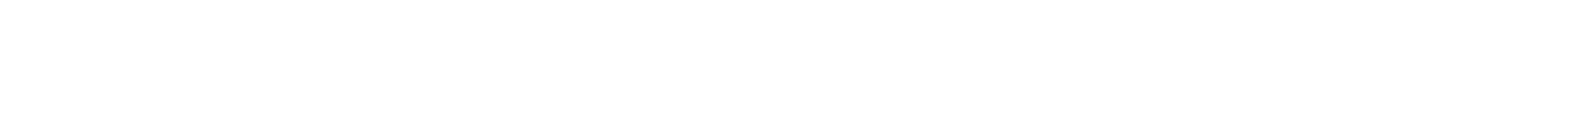
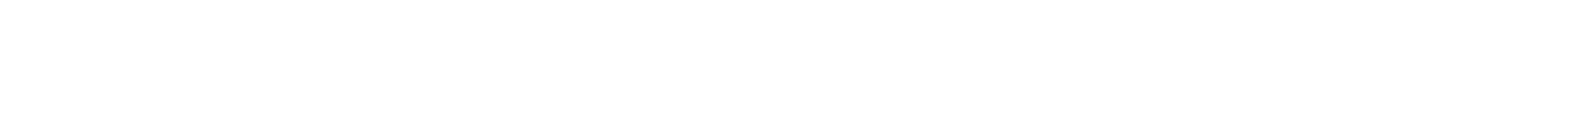
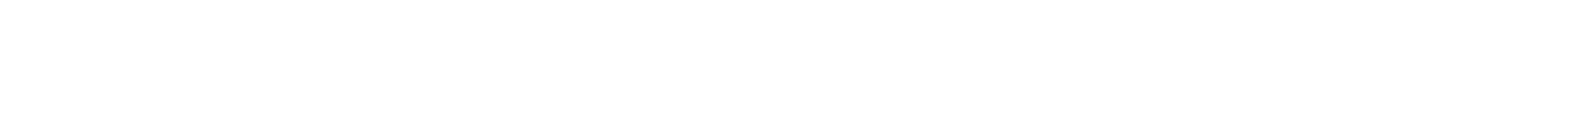
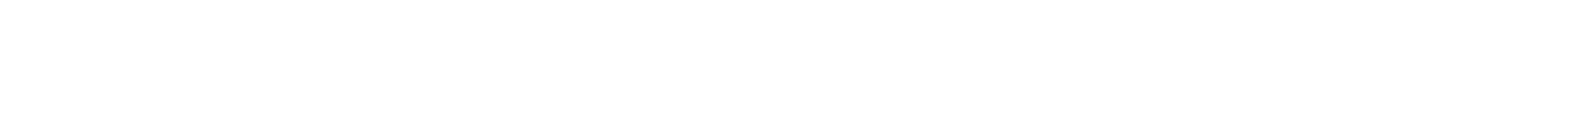

#### 13. ***What is the relationship between wind speed, wind direction, and air quality?***
   - **Visualization**:I used  a **wind rose bor polar plot**, with wind speed as the length of the bars and air quality levels represented by color.
   - **Purpose**: To analyze if higher wind speeds and certain wind directions correlate with better or worse air quality.

In [102]:

# Exclude days with very low wind speed (< 1 kph)
filtered_data = data[data['wind_kph'] >= 1]

# Create discrete wind direction bins
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
              'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
bins = np.linspace(0, 360, len(directions) + 1)
filtered_data['wind_direction_bin'] = pd.cut(
    filtered_data['wind_degree'], bins=bins, labels=directions, right=False, include_lowest=True
)

# Aggregate data by wind direction bin
agg_data = filtered_data.groupby('wind_direction_bin').agg({
    'wind_kph': 'mean',
    'air_quality_PM2.5': 'mean',
    'temperature_celsius': 'mean',
    'humidity': 'mean'
}).reset_index()

# Create a polar bar chart with hover data
fig = px.bar_polar(
    agg_data,
    r='wind_kph',
    theta='wind_direction_bin',
    color='air_quality_PM2.5',
    color_continuous_scale='RdYlGn_r',
    title="Wind Rose: Wind Speed, Wind Direction, and Air Quality (PM2.5)",
    labels={
        'wind_kph': 'Avg Wind Speed (kph)',
        'wind_direction_bin': 'Wind Direction',
        'air_quality_PM2.5': 'Avg PM2.5'
    },
    hover_data={
        'temperature_celsius': True,
        'humidity': True
    }
)

# Update layout for better visualization
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, agg_data['wind_kph'].max() * 1.1])
    ),
    margin=dict(l=20, r=20, t=50, b=20)
)

# Show the plot
fig.show()



<ipython-input-102-0367f741744c>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Explanation of the Wind Rose Charts: Relationship Between Wind Speed, Wind Direction, and Air Quality


1. **Wind Speed and Direction Distribution:**
   - Wind speed varies significantly depending on the direction. For instance:
     - Directions like **SSE (South-Southeast)** show medium to high wind speeds.
     - **E (East)** and **ENE (East-Northeast)** directions exhibit consistently high wind speeds.
   - Directions like **NNE (North-Northeast)** display moderate wind speeds.
   - Northwest (NW): Winds from this direction often show relatively high wind speeds (e.g., ~14 kph).
    - South (S) and East (E): Winds from these directions exhibit moderate wind speeds (~13–14 kph).
    - Southwest (SW): Winds from the southwest demonstrate lower speeds (~13 kph).

2. **Air Quality (PM2.5) Representation:**
   - The **color scale** on the bars represents PM2.5 concentrations.
     - **Green hues** indicate lower PM2.5 levels (better air quality).
     - **Red hues** indicate higher PM2.5 levels (poorer air quality).
   - Directions such as **ESE (East-Southeast)** and **SE (Southeast)** often correspond to lower PM2.5 levels, suggesting better air quality.
   - Higher PM2.5 levels (poor air quality) are observed in directions like **NNE (North-Northeast)** and **ENE (East-Northeast).**
   - Better Air Quality: Directions such as South (S) and Southwest (SW) are generally associated with lower PM2.5 levels (green bars), indicating better air quality. This suggests that these winds could be bringing in cleaner air from less polluted areas.
    - Poorer Air Quality: Directions like North (N) and Northeast (NE) often correlate with higher PM2.5 levels (red/orange bars), signifying poorer air quality. This could be due to industrial zones, urban centers, or other sources of pollution in these directions.

3. **Wind Speed and Air Quality Relationship:**
   - Generally, higher wind speeds (longer bars) are associated with better air quality (green colors).
   - Lower wind speeds correlate with poorer air quality (orange or red bars), suggesting stagnant air traps pollutants.
   - For example:
     - **NE (Northeast)** shows moderate to high wind speeds and moderate PM2.5 levels.
     - **SSE (South-Southeast)** shows high wind speeds with better air quality.

4. **Geographic or Seasonal Impacts:**
   - Wind direction and air quality likely vary by region or season. For instance:
     - Coastal regions may see cleaner air with winds from the ocean (e.g., SE winds).
     - Urban areas may have worse air quality during calm winds or directions carrying industrial emissions.

---

Higher wind speeds generally correlate with better air quality, as they help disperse pollutants. This is evident in the South and Southwest directions, where both lower PM2.5 levels and moderate wind speeds are observed.
Poorer air quality in the North and Northeast may indicate upwind pollution sources or stagnant air conditions in those regions.
